# Credit EDA Assignment

**Problem Statement:**

Customer is a loan provider company & the company find it hard to give loans to the people due to their insufficient or non-existent credit history.

**Business Understanding:**

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.


**Desired State of Customer:**

-  To identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. 
-   To understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.

<br>The company wants to utilise this knowledge for its portfolio and risk assessment. 


## Importing the necessary Libraries

In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

##  Reading the dataset

In [242]:
appl_data = pd.read_csv("application_data.csv")
print(appl_data.head())
print(appl_data.shape)

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1     

In [243]:
prev_appl_data = pd.read_csv("previous_application.csv")
print(prev_appl_data.head())
print(prev_appl_data.shape)


   SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  

[Columns_description Link](https://docs.google.com/spreadsheets/d/1ZbfbjT_RXiaVnv4vqoun5yhmvqeXNjNTHG4aoK3iKlg/edit?usp=sharing) #Column names description sheet

In [244]:
pd.set_option("display.max_columns",130) #to view all the columns in the dataset
pd.set_option("display.max_rows",500)  #to view all the rows in the dataset

In [245]:
appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [246]:
prev_appl_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [247]:
appl_data.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

## Data Cleaning of Application_dataSet

In [248]:
appl_data.isna().sum() #no. of null values in each of the columns

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [249]:
appl_data.shape[0] #total no. of rows present in the Application dataset

307511

In [250]:
percentage_na = (appl_data.isna().sum()/appl_data.shape[0]) * 100
percentage_na #% of null values in each & every column in Application dataset

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [251]:
percentage_na.sort_values(axis = 0, ascending = False) #Descending order of % of Null values in the application dataset

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

### Removing the columns in the dataset that has more than 40 % of null values

In [252]:
len(percentage_na[percentage_na > 40])

49

**Observation:** There are 49 columns that has more than 40% of Null values, Rather than Imputing It's better to remove those 49 columns (which has null value percentage >40) from the Application Data set for better accuracy

In [253]:
col_names = list(percentage_na[percentage_na > 40].index)
col_names

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [254]:
appl_data_01 = appl_data.drop(axis = 0, columns = col_names)
print("No.of Rows & Columns before filtering the data from the Application_dataSet:",appl_data.shape)
print("-"*100)
print("No. of Rows & Columns after filtering the data from Application_dataSet:",appl_data_01.shape)

No.of Rows & Columns before filtering the data from the Application_dataSet: (307511, 122)
----------------------------------------------------------------------------------------------------
No. of Rows & Columns after filtering the data from Application_dataSet: (307511, 73)


## Data Cleaning of Previous Application dataSet

In [255]:
prev_appl_data.isnull().sum() #Total no. of null values in the Previous Application dataSet

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [256]:
percent_null = (prev_appl_data.isnull().sum()/prev_appl_data.shape[0]) * 100
percent_null # percentage of null values in all the columns of the previous application data set

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [257]:
percent_null.sort_values(ascending = False) # Descending order of percentage of Missing Values

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [258]:
len(percent_null[percent_null > 40])

11

**Obeservation:** There are 11 columns in the Previous Application data where the missing values percentage is greater than 40. rather than imputing data for those columns it's better to delete those columns foe better analysis

In [259]:
prev_col_names = list(percent_null[percent_null > 40].index)
prev_col_names

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [260]:
prev_appl_data_01 = prev_appl_data.drop(axis = 0, columns = prev_col_names)
print("No.of Rows & Columns before filtering the data from the Previous Application_dataSet:",prev_appl_data.shape)
print("-"*100)
print("No. of Rows & Columns after filtering the data from Previous Application_dataSet:",prev_appl_data_01.shape)

No.of Rows & Columns before filtering the data from the Previous Application_dataSet: (1670214, 37)
----------------------------------------------------------------------------------------------------
No. of Rows & Columns after filtering the data from Previous Application_dataSet: (1670214, 26)


### Imputing data for Application dataset

In [261]:
appl_data_01.isnull().sum() #Count of null values in the modified application dataset

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [262]:
a = appl_data_01.isnull().sum()/appl_data_01.shape[0] * 100
a #percentage of the Count of null values in the updated Application dataset

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [263]:
a.sort_values(axis = 0, ascending = False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3 

In [264]:
#OCCUPATION_TYPE has the max. missing values i.e, 31.345 %
#It seems to be an important variable for the analysis,Imputing with either median/ mode will affect the analysis
#Rather than IMputing the data, It's better to fill the missing values with some new variable "Info Unavailable"
appl_data_01["OCCUPATION_TYPE"].fillna(value = 'unknown', inplace = True)

In [265]:
appl_data_01.isnull().sum().sort_values(ascending = False)/appl_data_01.shape[0] * 100 
#OCCUPATION_TYPE column has 0 missing values 

EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_5                 0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3                 0.000000
FLAG_DOCUMENT_4 

In [266]:
appl_data_01['EXT_SOURCE_3'].describe() #Here we can see that the Mean & Median are almost same for EXT_SOURCE_3 column

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [267]:
appl_data_01['EXT_SOURCE_3'].median()

0.5352762504724826

In [268]:
#Imputing the Median is always advisible than imputing the Mean
#Here we are Imputing Median for all the Missing values in the EXTERNAL_SOURCE_3 Column
appl_data_01['EXT_SOURCE_3'].fillna(value = appl_data_01['EXT_SOURCE_3'].median(), inplace = True)

In [269]:
appl_data_01.isnull().sum().sort_values(ascending = False)/appl_data_01.shape[0] * 100 
#'EXT_SOURCE_3' column has 0 missing values

AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_18                0.000000
EXT_SOURCE_3                    0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3                 0.000000
FLAG_DOCUMENT_4                 0.000000
FLAG_DOCUMENT_5 

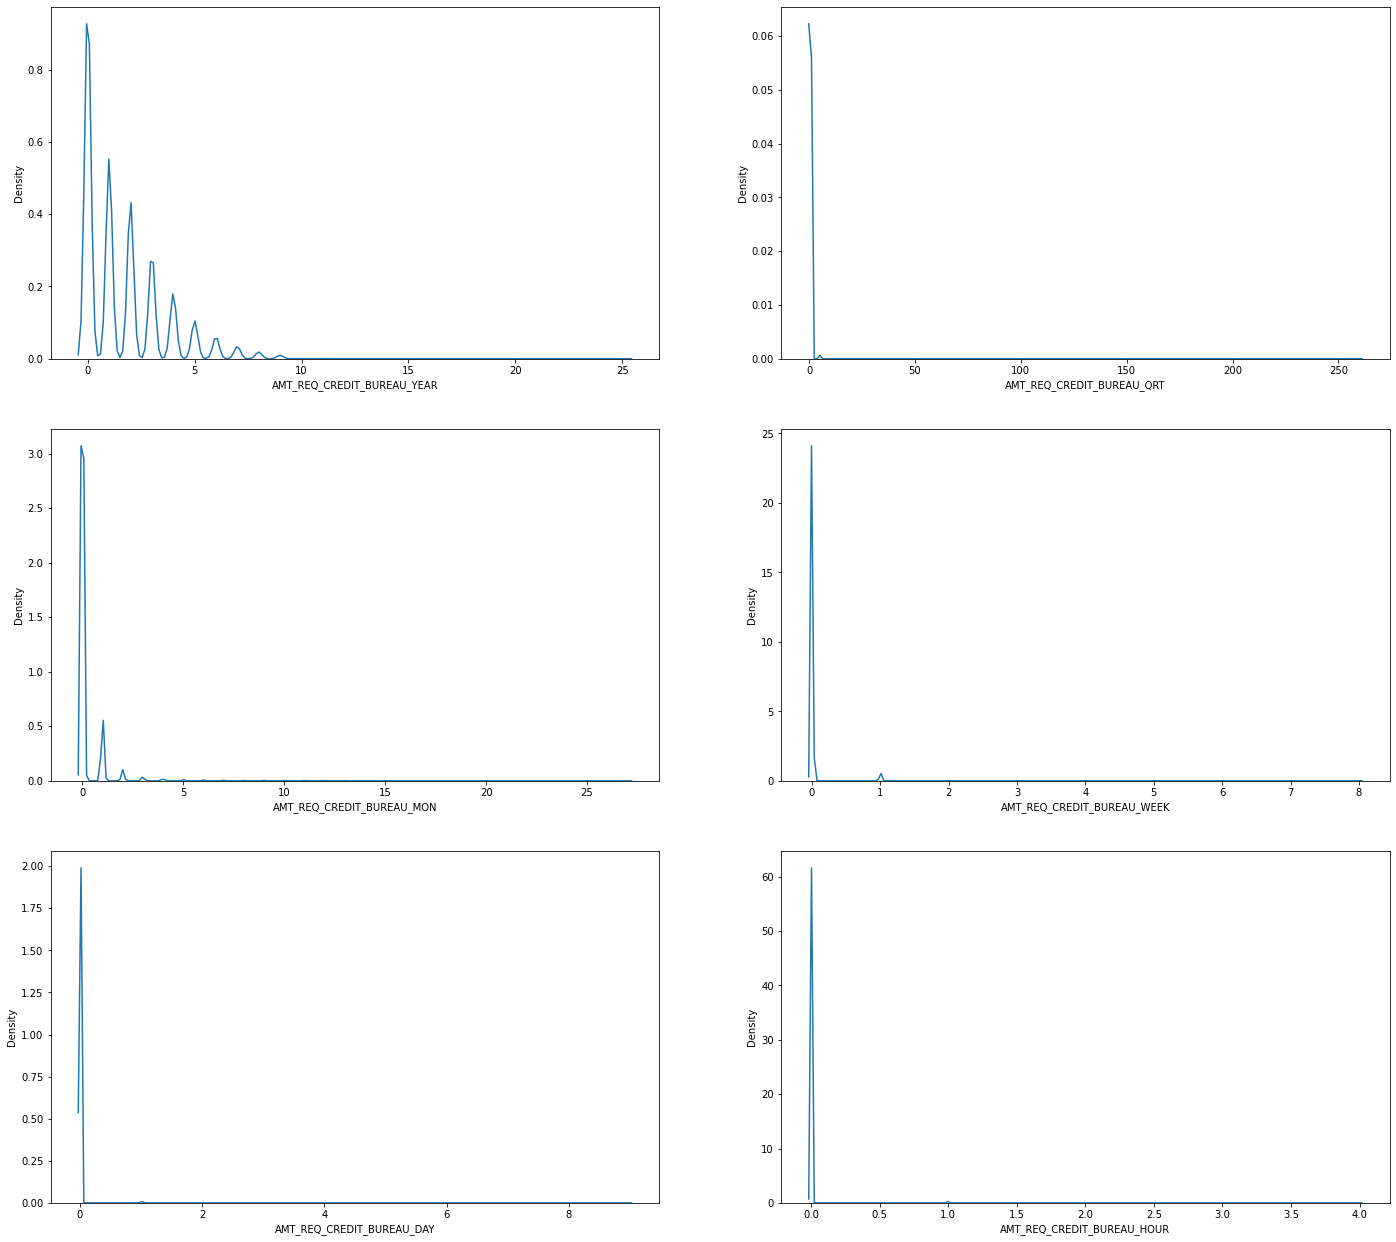

In [333]:
#AMT_REQ_CREDIT_BUREAU_xxxx = Number of enquiries to Credit Bureau about the client XXXX before application

plt.figure(figsize = [24,22])
plt.subplot(3,2,1)
sns.kdeplot(appl_data_01["AMT_REQ_CREDIT_BUREAU_YEAR"])
plt.subplot(3,2,2)
sns.kdeplot(appl_data_01["AMT_REQ_CREDIT_BUREAU_QRT"])
plt.subplot(3,2,3)
sns.kdeplot(appl_data_01["AMT_REQ_CREDIT_BUREAU_MON"])
plt.subplot(3,2,4)
sns.kdeplot(appl_data_01["AMT_REQ_CREDIT_BUREAU_WEEK"])
plt.subplot(3,2,5)
sns.kdeplot(appl_data_01["AMT_REQ_CREDIT_BUREAU_DAY"])
plt.subplot(3,2,6)
sns.kdeplot(appl_data_01["AMT_REQ_CREDIT_BUREAU_HOUR"]);

**Outliers Analysis of Application dataset**

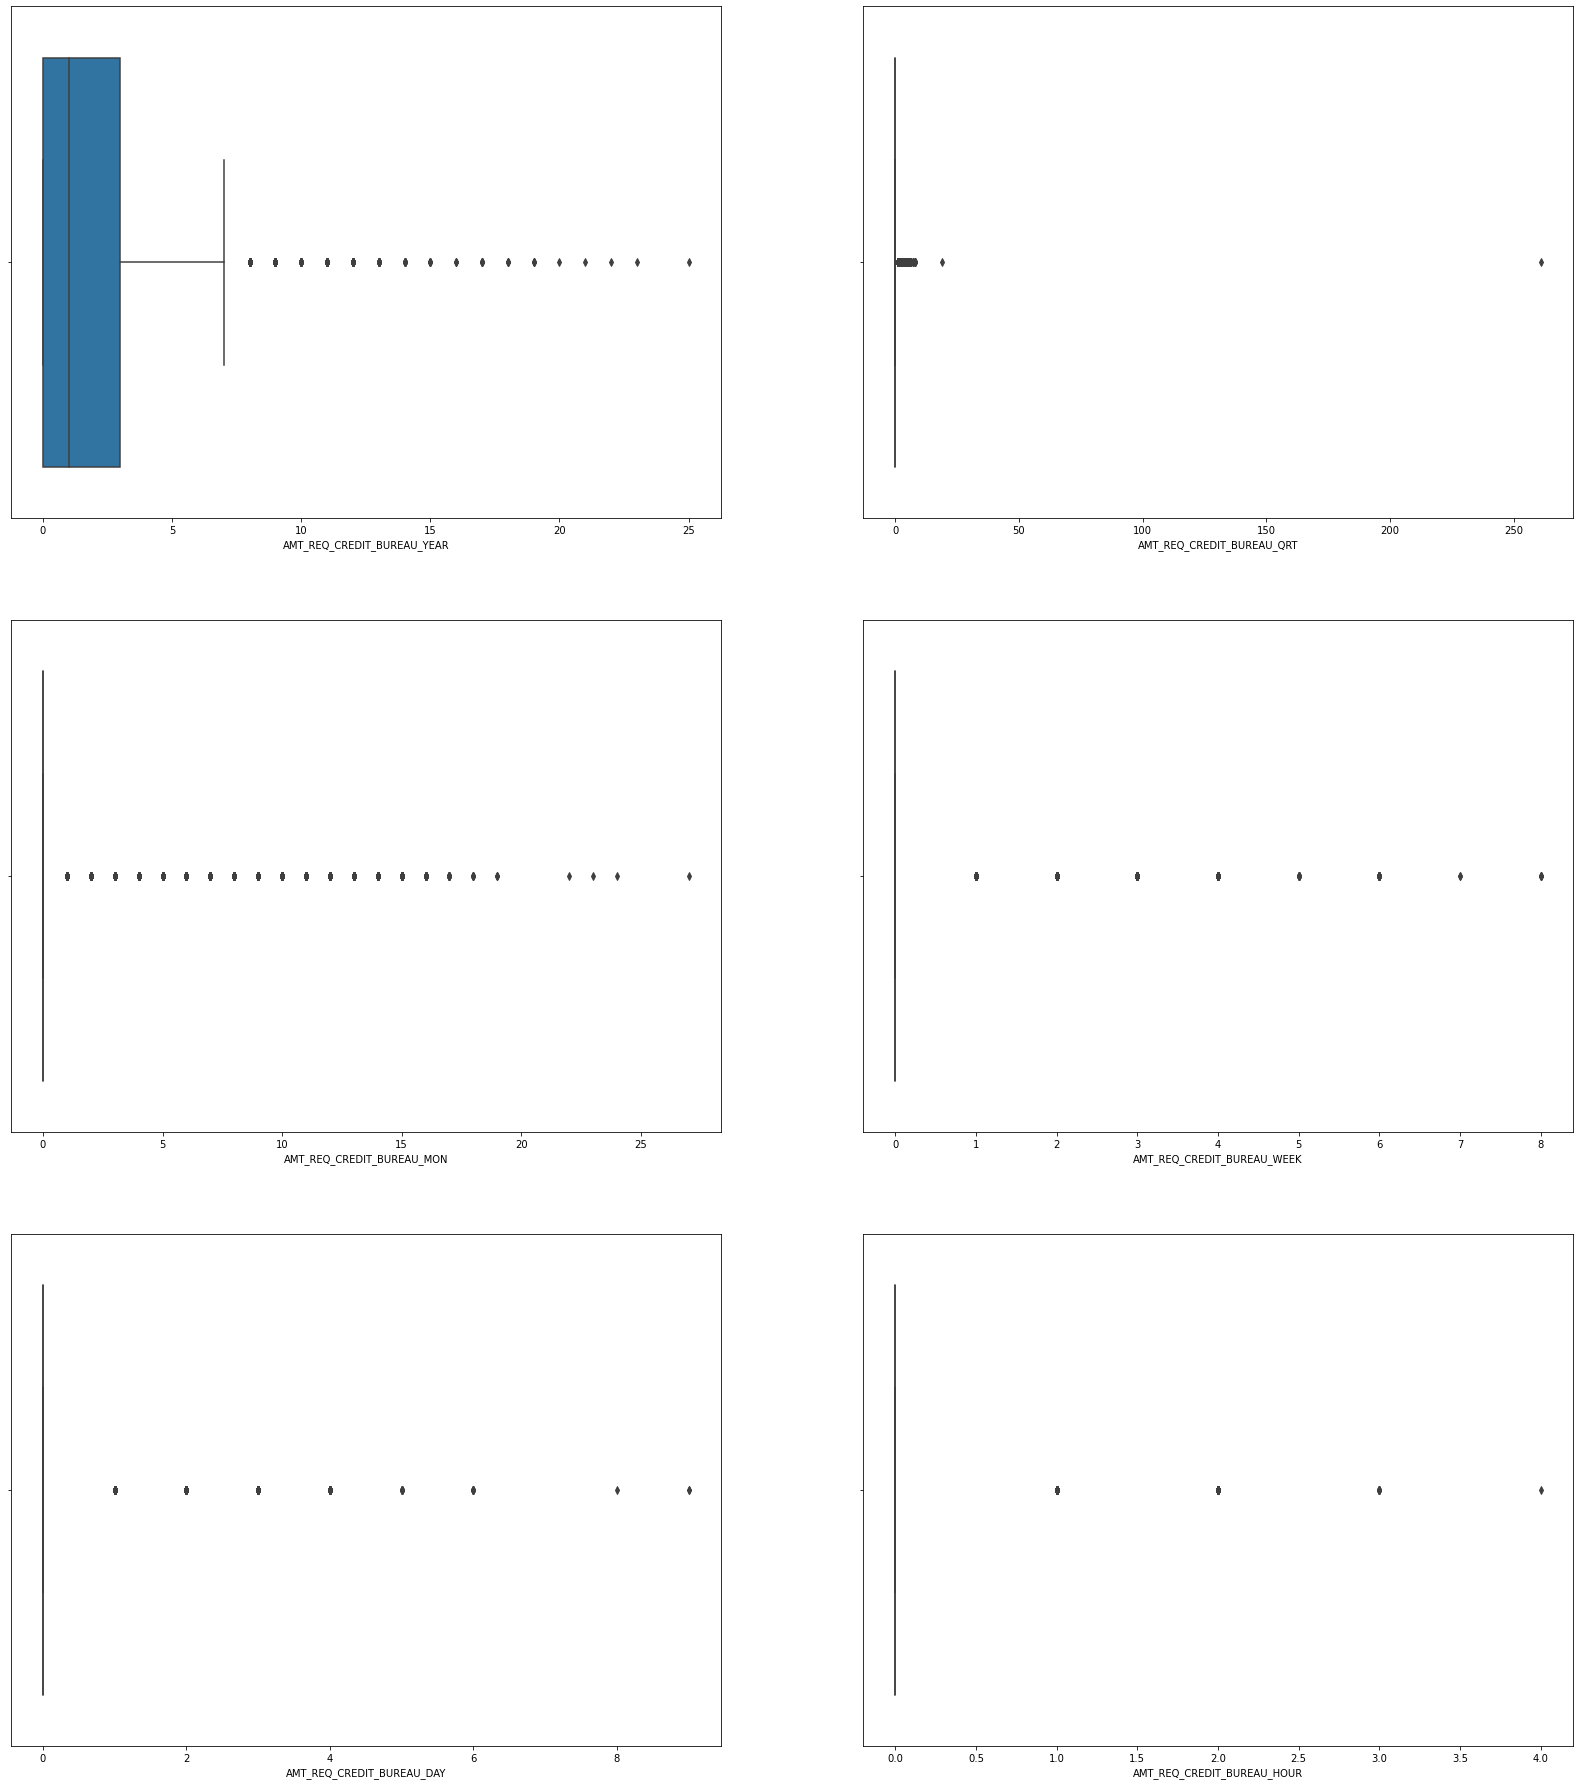

In [449]:

plt.figure(figsize = [28,32])
plt.subplot(3,2,1)
sns.boxplot(appl_data_01["AMT_REQ_CREDIT_BUREAU_YEAR"])
plt.subplot(3,2,2)
sns.boxplot(appl_data_01["AMT_REQ_CREDIT_BUREAU_QRT"])
plt.subplot(3,2,3)
sns.boxplot(appl_data_01["AMT_REQ_CREDIT_BUREAU_MON"])
plt.subplot(3,2,4)
sns.boxplot(appl_data_01["AMT_REQ_CREDIT_BUREAU_WEEK"])
plt.subplot(3,2,5)
sns.boxplot(appl_data_01["AMT_REQ_CREDIT_BUREAU_DAY"])
plt.subplot(3,2,6)
sns.boxplot(appl_data_01["AMT_REQ_CREDIT_BUREAU_HOUR"]);

**Observation:** From the KDE Plots & Box Plots, we can say that imputing mean & median doesn't make sense here.From the Graphs we can conclude that we have to impute Mode data for all those"AMT_REQ_CREDIT_BUREAU_xxxx" columns for getting better results in the analysis

In [271]:
appl_data_01['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(value = appl_data_01['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0], inplace = True)
# Imputing the mode for the 'AMT_REQ_CREDIT_BUREAU_YEAR'

In [273]:
appl_data_01['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum()
# Count of Null values after Imputing the Mode

0

In [283]:
appl_data_01['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(value = appl_data_01['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0], inplace = True)
appl_data_01['AMT_REQ_CREDIT_BUREAU_MON'].fillna(value = appl_data_01['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0], inplace = True)
appl_data_01['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(value = appl_data_01['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0], inplace = True)
appl_data_01['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(value = appl_data_01['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0], inplace = True)
appl_data_01['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(value = appl_data_01['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0], inplace = True)
#IUmputing the mode for all the"AMT_REQ_CREDIT_BUREAU_xxxx" columns 

In [299]:
b = appl_data_01.isnull().sum().sort_values(ascending = False)/appl_data_01.shape[0] * 100
b
#"AMT_REQ_CREDIT_BUREAU_xxxx" column has 0 missing values

NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_10               0.000000
EXT_SOURCE_3                   0.000000
FLAG_DOCUMENT_3                0.000000
FLAG_DOCUMENT_4                0.000000
FLAG_DOCUMENT_5                0.000000
FLAG_DOCUMENT_6                0.000000
FLAG_DOCUMENT_7                0.000000
FLAG_DOCUMENT_8                0.000000
FLAG_DOCUMENT_9                0.000000
SK_ID_CURR                     0.000000
FLAG_DOCUMENT_11               0.000000
FLAG_DOCUMENT_20               0.000000
AMT_REQ_CREDIT_BUREAU_QRT      0.000000
AMT_REQ_CREDIT_BUREAU_MON      0.000000


In [312]:
missing_data = b[b > 0].index
missing_data

Index(['NAME_TYPE_SUITE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [322]:
for i in missing_data:
      print(appl_data_01[i])
      print("="*60)
#Inspecting the data of the missing_data columns

0         Unaccompanied
1                Family
2         Unaccompanied
3         Unaccompanied
4         Unaccompanied
              ...      
307506    Unaccompanied
307507    Unaccompanied
307508    Unaccompanied
307509    Unaccompanied
307510    Unaccompanied
Name: NAME_TYPE_SUITE, Length: 307511, dtype: object
0         2.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
307506    0.0
307507    0.0
307508    0.0
307509    0.0
307510    0.0
Name: DEF_60_CNT_SOCIAL_CIRCLE, Length: 307511, dtype: float64
0         2.0
1         1.0
2         0.0
3         2.0
4         0.0
         ... 
307506    0.0
307507    0.0
307508    6.0
307509    0.0
307510    0.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, Length: 307511, dtype: float64
0         2.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
307506    0.0
307507    0.0
307508    0.0
307509    0.0
307510    0.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, Length: 307511, dtype: float64
0         2.0
1         1.0
2   

In [325]:
#'NAME_TYPE_SUITE' is an object category with 0.42% nulls.
# Hence,imputing with with the most frequent category using mode()[0] would make sense
appl_data_01['NAME_TYPE_SUITE'].fillna(
    value=appl_data_01['NAME_TYPE_SUITE'].mode()[0], inplace=True)

# imputing data for columns which has less than 1% of null values with median. These are also float columns
appl_data_01['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(
    value=appl_data_01['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

appl_data_01['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(
    value=appl_data_01['DEF_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

appl_data_01['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(
    value=appl_data_01['OBS_60_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

appl_data_01['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(
    value=appl_data_01['DEF_60_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

appl_data_01['EXT_SOURCE_2'].fillna(
    value=appl_data_01['EXT_SOURCE_2'].median(), inplace=True)

appl_data_01['AMT_GOODS_PRICE'].fillna(
    value=appl_data_01['AMT_GOODS_PRICE'].median(), inplace=True)

appl_data_01['AMT_ANNUITY'].fillna(
    value=appl_data_01['AMT_ANNUITY'].median(), inplace=True)

appl_data_01['CNT_FAM_MEMBERS'].fillna(
    value=appl_data_01['CNT_FAM_MEMBERS'].median(), inplace=True)

appl_data_01['DAYS_LAST_PHONE_CHANGE'].fillna(
    value=appl_data_01['DAYS_LAST_PHONE_CHANGE'].median(), inplace=True)

In [342]:
e = appl_data_01.isnull().sum().sort_values(ascending = False)
e
#Count of null values in all the columns is 0

SK_ID_CURR                     0
REG_CITY_NOT_WORK_CITY         0
FLAG_DOCUMENT_8                0
FLAG_DOCUMENT_7                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_5                0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_2                0
DAYS_LAST_PHONE_CHANGE         0
DEF_60_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT_SOCIAL_CIRCLE       0
DEF_30_CNT_SOCIAL_CIRCLE       0
OBS_30_CNT_SOCIAL_CIRCLE       0
EXT_SOURCE_3                   0
EXT_SOURCE_2                   0
ORGANIZATION_TYPE              0
FLAG_DOCUMENT_9                0
FLAG_DOCUMENT_10               0
FLAG_DOCUMENT_11               0
FLAG_DOCUMENT_20               0
AMT_REQ_CREDIT_BUREAU_QRT      0
AMT_REQ_CREDIT_BUREAU_MON      0
AMT_REQ_CREDIT_BUREAU_WEEK     0
AMT_REQ_CREDIT_BUREAU_DAY      0
AMT_REQ_CREDIT_BUREAU_HOUR     0
FLAG_DOCUMENT_21               0
FLAG_DOCUMENT_19               0
FLAG_DOCUMENT_12               0
FLAG_DOCUMENT_18               0
FLAG_DOCUM

In [343]:
e.index

Index(['SK_ID_CURR', 'REG_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_2',
       'DAYS_LAST_PHONE_CHANGE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'EXT_SOURCE_2',
       'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_20', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_13',
       'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY', 'TARGET',
       'LIVE_REGION_NOT_WORK_REGION', 'REGION_POPULATION_RELATIVE',
 

### Imputing the Data for Previous Application dataset

In [327]:
prev_appl_data_01.isnull().sum() #Count of null values in the modified application dataset

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

In [329]:
c = prev_appl_data_01.isnull().sum().sort_values(ascending = False)/prev_appl_data_01.shape[0] * 100
c #percentage of the Count of null values in the updated Previous Application dataset

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

In [330]:
d = c[c>20].index
d

Index(['AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT'], dtype='object')

In [332]:
for t in d:
    print(prev_appl_data_01[t])
    print("."*60)
#Inspecting the data types of Null value columns

0           17145.0
1          607500.0
2          112500.0
3          450000.0
4          337500.0
             ...   
1670209    267295.5
1670210     87750.0
1670211    105237.0
1670212    180000.0
1670213    360000.0
Name: AMT_GOODS_PRICE, Length: 1670214, dtype: float64
............................................................
0           1730.430
1          25188.615
2          15060.735
3          47041.335
4          31924.395
             ...    
1670209    14704.290
1670210     6622.020
1670211    11520.855
1670212    18821.520
1670213    16431.300
Name: AMT_ANNUITY, Length: 1670214, dtype: float64
............................................................
0          12.0
1          36.0
2          12.0
3          12.0
4          24.0
           ... 
1670209    30.0
1670210    12.0
1670211    10.0
1670212    12.0
1670213    48.0
Name: CNT_PAYMENT, Length: 1670214, dtype: float64
............................................................


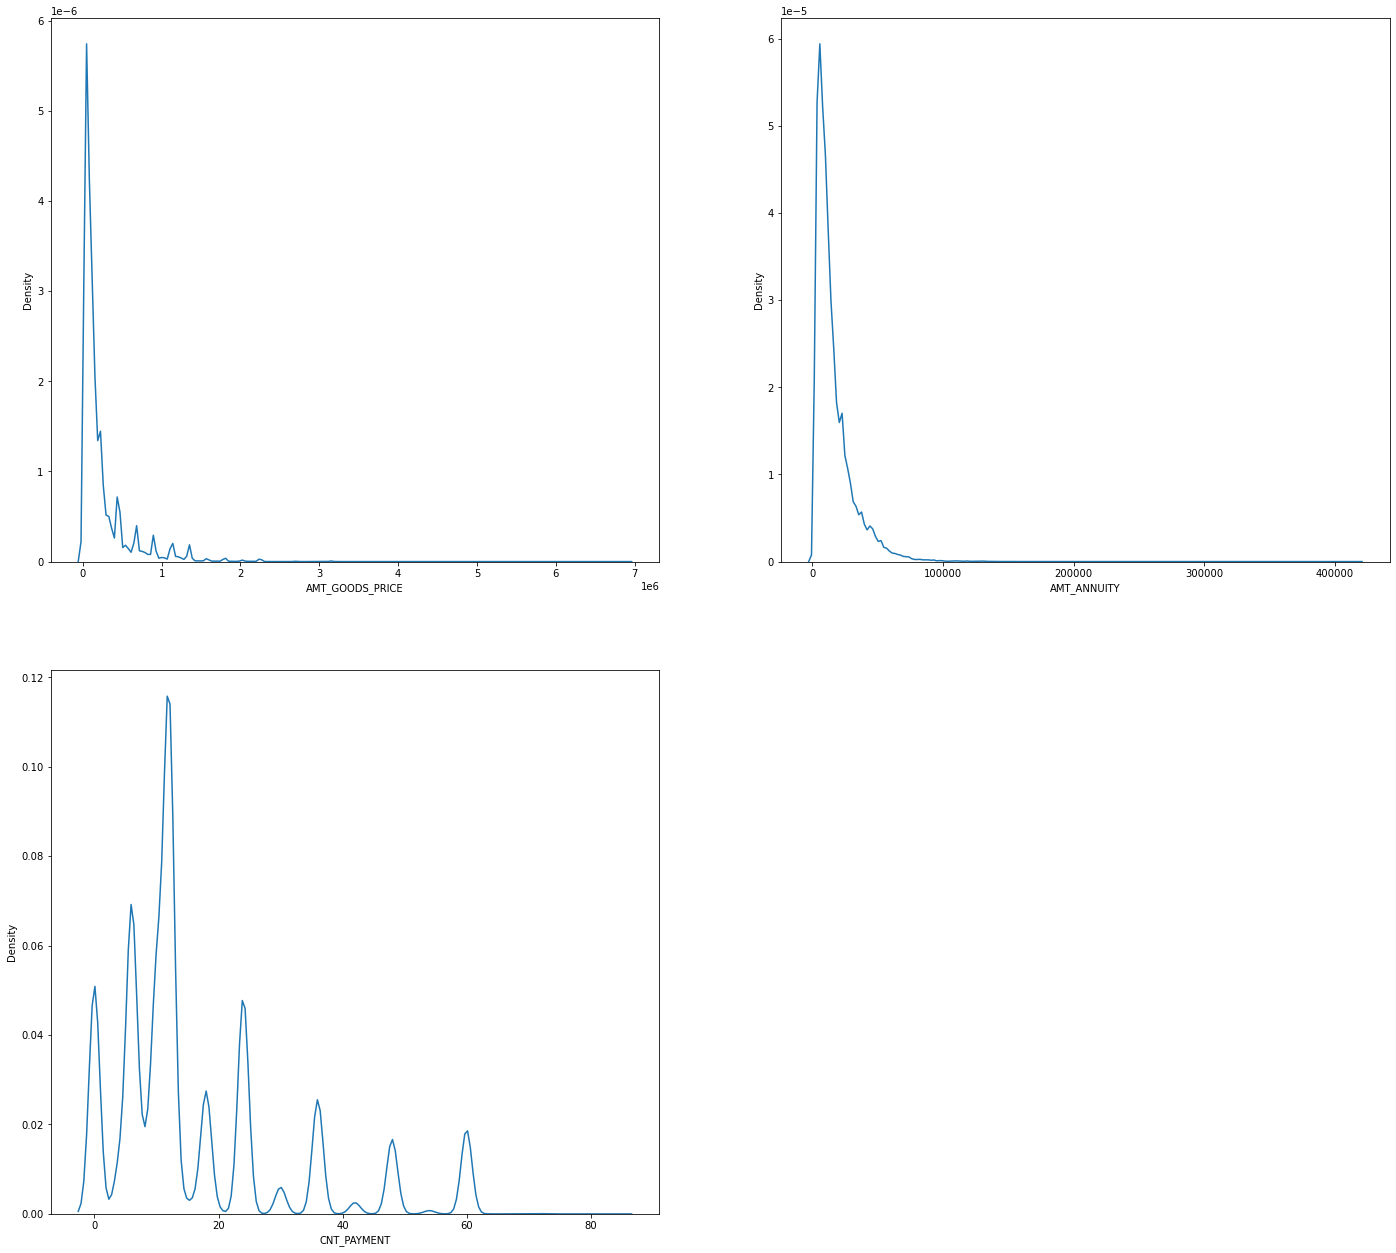

In [338]:
plt.figure(figsize = [24,22])
plt.subplot(2,2,1)
sns.kdeplot(prev_appl_data_01["AMT_GOODS_PRICE"])
plt.subplot(2,2,2)
sns.kdeplot(prev_appl_data_01["AMT_ANNUITY"])
plt.subplot(2,2,3)
sns.kdeplot(prev_appl_data_01["CNT_PAYMENT"]);

**Outliers Analysis of Previous Application dataset**

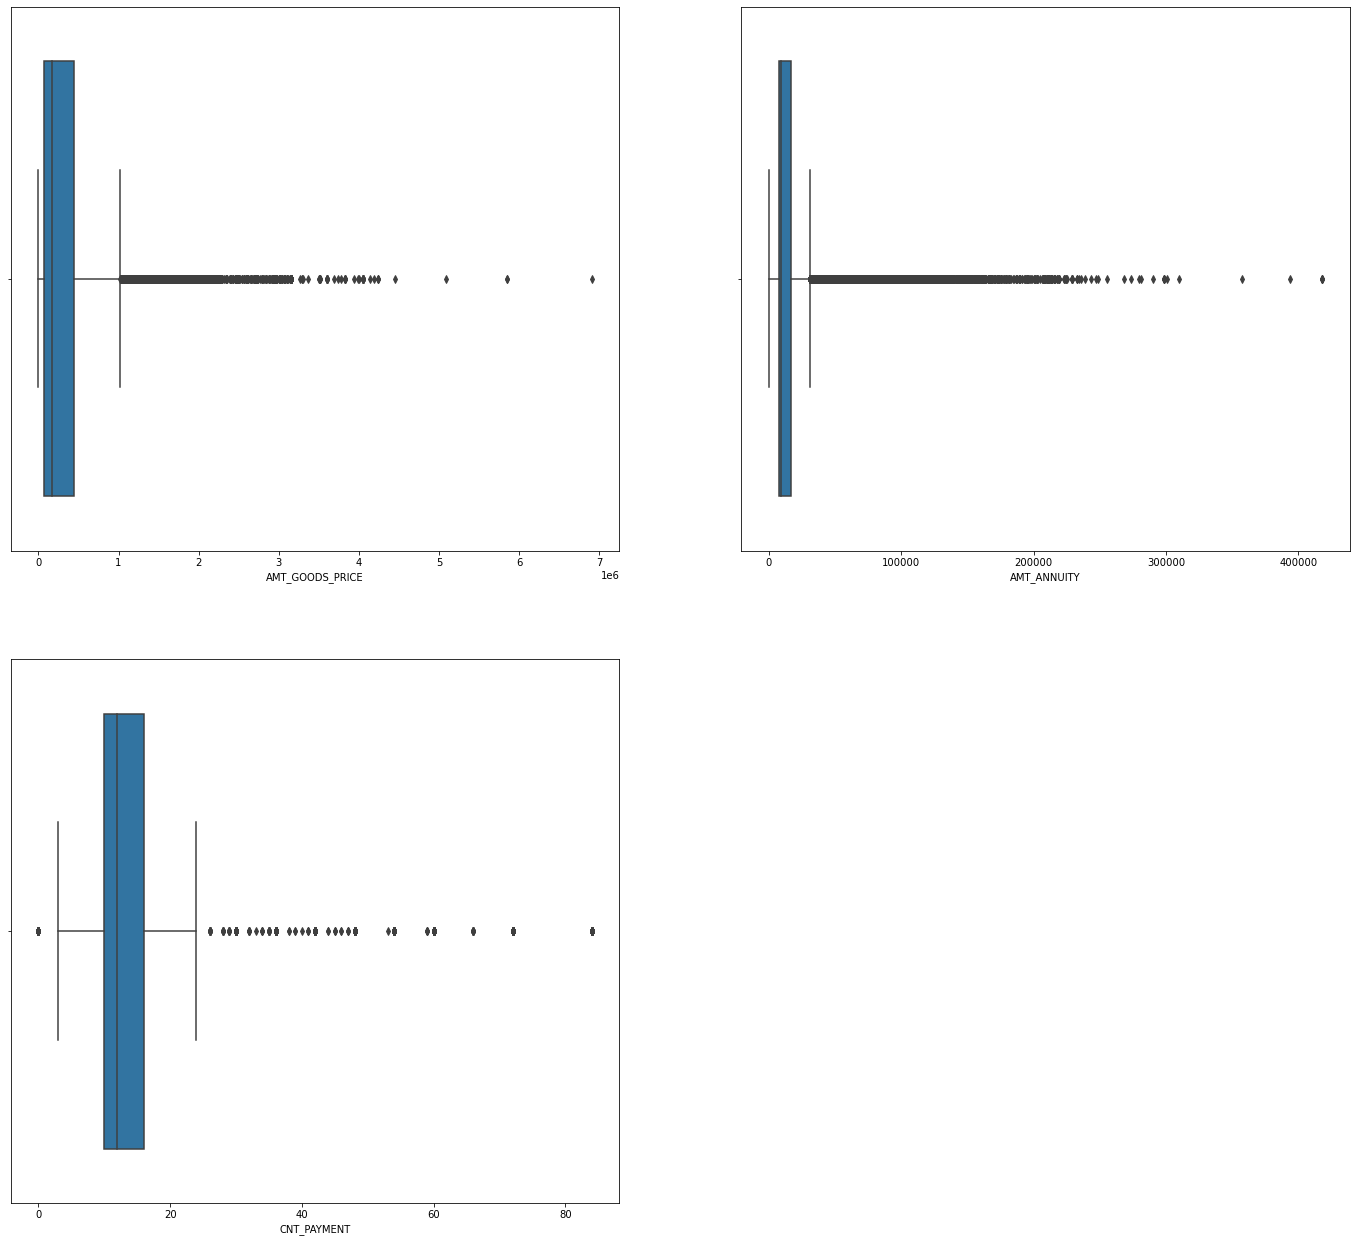

In [444]:
plt.figure(figsize = [24,22])
plt.subplot(2,2,1)
sns.boxplot(prev_appl_data_01["AMT_GOODS_PRICE"])
plt.subplot(2,2,2)
sns.boxplot(prev_appl_data_01["AMT_ANNUITY"])
plt.subplot(2,2,3)
sns.boxplot(prev_appl_data_01["CNT_PAYMENT"]);

**Obsevation:** From the KDE Plots & Box Plots of AMT_GOODS_PRICE & AMT_ANNUITY, we cant impute mean of the data 
as the entire curve is shifted towards the left.
We can Impute Mode for those 2 columns i.e, AMT_GOODS_PRICE, AMT_ANNUITY

we cant impute mean for CNT_PAYMENT column & it's better to impute median data to CNT_PAYMENT to get better results 

In [340]:
prev_appl_data_01["AMT_GOODS_PRICE"].fillna(
    value=prev_appl_data_01["AMT_GOODS_PRICE"].mode()[0], inplace=True)

prev_appl_data_01["AMT_ANNUITY"].fillna(
    value=prev_appl_data_01["AMT_ANNUITY"].mode()[0], inplace=True)

prev_appl_data_01["CNT_PAYMENT"].fillna(
    value=prev_appl_data_01["CNT_PAYMENT"].median(), inplace=True)
#Imputing the data for the null values

In [341]:
prev_appl_data_01.isnull().sum().sort_values(ascending = False)/prev_appl_data_01.shape[0] * 100
#Still PRODUCT_COMBINATION column has null values but we can neglect those as the %null values is less than 0.05%

PRODUCT_COMBINATION            0.020716
AMT_CREDIT                     0.000060
NAME_PAYMENT_TYPE              0.000000
NAME_YIELD_GROUP               0.000000
CNT_PAYMENT                    0.000000
NAME_SELLER_INDUSTRY           0.000000
SELLERPLACE_AREA               0.000000
CHANNEL_TYPE                   0.000000
NAME_PRODUCT_TYPE              0.000000
NAME_PORTFOLIO                 0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_CLIENT_TYPE               0.000000
CODE_REJECT_REASON             0.000000
SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_STATUS           0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
HOUR_APPR_PROCESS_START        0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
AMT_GOODS_PRICE                0.000000
AMT_APPLICATION                0.000000
AMT_ANNUITY                    0.000000
NAME_CONTRACT_TYPE             0.000000


### Standardising values of Application dataset

In [345]:
appl_data_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [346]:
#Information of the all the categorical columns which we will be useful for our futher analysis
object_type_cols= appl_data_01.select_dtypes(include ='object')
l_object_type_cols = list(object_type_cols.columns.values.tolist())#for converting the array to list we are using tolist()
for i in l_object_type_cols:
    print("**************************")
    print("         "+i+"          ")
    print(appl_data_01[i].value_counts())
    print("**************************")

**************************
         NAME_CONTRACT_TYPE          
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
**************************
**************************
         CODE_GENDER          
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
**************************
**************************
         FLAG_OWN_CAR          
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
**************************
**************************
         FLAG_OWN_REALTY          
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
**************************
**************************
         NAME_TYPE_SUITE          
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
**************************
**************************
         NAME_INCOME_TYPE       

#### There are some useful numerical columns which are really important for our analysis, now we will standardize important numerical columns

In [347]:
appl_data_01["CNT_CHILDREN"].value_counts() #We can use "CNT_CHILDREN" for our analysis 
# People with no children/with Children are most likely to be defaulters

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

In [349]:
appl_data_01["AMT_INCOME_TOTAL"].astype(int) #Converted the Float to int for ease, 
#Also if we can convert this numerical values into categorical columns will be useful for the analysis

0         202500
1         270000
2          67500
3         135000
4         121500
           ...  
307506    157500
307507     72000
307508    153000
307509    171000
307510    157500
Name: AMT_INCOME_TOTAL, Length: 307511, dtype: int32

**Converting the AMT_INCOME_TOTAL"into bins**

In [350]:
#Creating bins for income amount 
# Amt_Income_Total has e+5 hence dividing it by 10^5 = 100000

appl_data_01['AMT_INCOME_TOTAL']=appl_data_01['AMT_INCOME_TOTAL']/100000

# Binning Amt_Income_Total into 12 groups
bins = [0,1,2,3,4,5,6,7,8,9,10,1200]
range = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

appl_data_01['AMT_INCOME_RANGE']=pd.cut(appl_data_01['AMT_INCOME_TOTAL'],bins,labels=range)

In [355]:
appl_data_01['AMT_INCOME_RANGE'].value_counts(normalize = True)*100

100K-200K    50.696723
200k-300k    21.194689
0-100K       20.714056
300k-400k     4.772512
400k-500k     1.743352
500k-600k     0.356085
600k-700k     0.282592
800k-900k     0.096907
1M Above      0.081298
700k-800k     0.052681
900k-1M       0.009105
Name: AMT_INCOME_RANGE, dtype: float64

**Observation:** Around **51%** of the people's Income range is around **100k - 200K** & Around **92%** people's Income range is below **300K**

In [356]:
appl_data_01["AMT_CREDIT"].value_counts()
#AMT_CREDIT = Credit amount of the loan, This information will be useful fo r our analysis.

450000.0     9709
675000.0     8877
225000.0     8162
180000.0     7342
270000.0     7241
             ... 
487318.5        1
630400.5        1
1875276.0       1
1395895.5       1
1391130.0       1
Name: AMT_CREDIT, Length: 5603, dtype: int64

In [357]:
# Creating bins for Credit amount
appl_data_01['AMT_CREDIT']=appl_data_01['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
range = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

appl_data_01['AMT_CREDIT_RANGE']=pd.cut(appl_data_01['AMT_CREDIT'],bins=bins,labels=range)

In [358]:
#checking the % of data in each bin 
appl_data_01['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

**Observation:** Around **17%** of people has taken loan amount more than **1 Million**

In [400]:
appl_data_01["DAYS_BIRTH"] #There are minus days which needs to be standardized

0        -26
1        -46
2        -53
3        -53
4        -55
          ..
307506   -26
307507   -57
307508   -42
307509   -33
307510   -47
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [401]:
appl_data_01["DAYS_EMPLOYED"] #There are negitive values in Days Employed Column also
#We need to standardize the COlumns that are starting with Dys

0           -637
1          -1188
2           -225
3          -3039
4          -3038
           ...  
307506      -236
307507    365243
307508     -7921
307509     -4786
307510     -1262
Name: DAYS_EMPLOYED, Length: 307511, dtype: int64

In [411]:
#Converting Negative days to Positive days

negitive_to_postive = [col for col in appl_data_01 if col.startswith("DAYS")]

for i in negitive_to_postive:
    appl_data_01[i] = abs(appl_data_01[i])

In [412]:
print(appl_data_01["DAYS_BIRTH"].unique()) #It is in terms of age only so no we can directly group them into bins
print(appl_data_01["DAYS_EMPLOYED"].unique())#This is interms of days we need to convert it to years

[26 46 53 55 47 38 52 56 40 28 37 39 24 36 27 49 32 51 41 31 69 44 29 42
 33 34 48 58 66 45 65 22 60 50 57 63 54 43 30 68 64 62 59 61 35 23 25 67
 70 21]
[  637  1188   225 ... 12971 11084  8694]


In [407]:
# Create Age_Group column,Bins & Seggregating the entire data into those bins for our analysis
appl_data_01['AGE_GROUP']=pd.cut(appl_data_01['DAYS_BIRTH'],[0,20,30,40,50,200],
                                 labels=['0-20','20-30','30-40','40-50','50 above'])

In [410]:
appl_data_01['AGE_GROUP'].value_counts(normalize = True) * 100 

50 above    33.703185
30-40       26.765872
40-50       24.890492
20-30       14.640452
0-20         0.000000
Name: AGE_GROUP, dtype: float64

**Obsevation:** More than **55%** of the Loan takers are above **40 years**

In [416]:
#Comberting the days to years for the DAYS_EMPLOYED column
#DAYS_EMPLOYED = How many days before the application the person started current employment
appl_data_01["EMPLOYED_YEARS"] = appl_data_01["DAYS_EMPLOYED"] / 365
appl_data_01["EMPLOYED_YEARS"].head() 

0    1.745205
1    3.254795
2    0.616438
3    8.326027
4    8.323288
Name: EMPLOYED_YEARS, dtype: float64

In [417]:
#Creating the Bins for the EMPLOYED_YEARS column which will be useful during the analysis
bins = [0,5,10,20,30,40,50,60,200]
range = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

appl_data_01['YEARS_EMPLOYED_RANGE']=pd.cut(appl_data_01['EMPLOYED_YEARS'],bins=bins,labels=range)

In [418]:
#checking the % of data in each bin 
appl_data_01['YEARS_EMPLOYED_RANGE'].value_counts(normalize=True)*100

0-5         54.061911
5-10        25.729074
10-20       15.229143
20-30        3.788050
30-40        1.099014
40-50        0.092807
50-60        0.000000
60 above     0.000000
Name: YEARS_EMPLOYED_RANGE, dtype: float64

**Observation:** Around **55%** of people who took loans has started their current employment before **"0-5 years"** from the day of applying for the Loan

### Standardizing values of Previous Apllication dataset

In [419]:
prev_appl_data_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1670214 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1670214 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [420]:
#Information of the all the categorical columns which we will be useful for our futher analysis
object_type_cols1= prev_appl_data_01.select_dtypes(include ='object')
l_object_type_cols1 = list(object_type_cols1.columns.values.tolist())#for converting the array to list we are using tolist()
for i in l_object_type_cols1:
    print("**************************")
    print("         "+i+"          ")
    print(prev_appl_data_01[i].value_counts())
    print("**************************")

**************************
         NAME_CONTRACT_TYPE          
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64
**************************
**************************
         WEEKDAY_APPR_PROCESS_START          
TUESDAY      255118
WEDNESDAY    255010
MONDAY       253557
FRIDAY       252048
THURSDAY     249099
SATURDAY     240631
SUNDAY       164751
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64
**************************
**************************
         FLAG_LAST_APPL_PER_CONTRACT          
Y    1661739
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64
**************************
**************************
         NAME_CASH_LOAN_PURPOSE          
XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car  

#### There are some useful numerical columns which are really important for our analysis, now we will standardize important numerical columns

In [427]:
#DAYS_DECISION = Relative to current application when was the decision about previous application made
prev_appl_data_01["DAYS_DECISION"].value_counts() 
#the Days_decision is negative, We need to convert to positive

-245     2444
-238     2390
-210     2375
-273     2350
-196     2315
         ... 
-2882     163
-2922     162
-2921     158
-2902     148
-1          2
Name: DAYS_DECISION, Length: 2922, dtype: int64

In [430]:
#Converting negative days to positive
prev_appl_data_01['DAYS_DECISION'] = abs(prev_appl_data_01['DAYS_DECISION'])
prev_appl_data_01["DAYS_DECISION"].value_counts() 

245     2444
238     2390
210     2375
273     2350
196     2315
        ... 
2882     163
2922     162
2921     158
2902     148
1          2
Name: DAYS_DECISION, Length: 2922, dtype: int64

In [440]:
# Creating bins for days_decision
# dividing days_decision by 400

prev_appl_data_01['DAYS_DECISION']=prev_appl_data_01['DAYS_DECISION']/400

# Binning Amt_Income_Total into 12 groups
bins = [0,1,2,3,4,5,6,7,8,9,10,1200]
range = ['0-400','400-800', '800-1200','1200-1600','1600-2000','2000-2400','2400-2800','2800-3200','3200-3600','3600-4000', '4000 Above']

prev_appl_data_01['DAYS_DECISION_RANGE']=pd.cut(prev_appl_data_01['DAYS_DECISION'],bins = bins,labels=range)

In [442]:
#Viewing the % of Bins for Days_decision column
prev_appl_data_01['DAYS_DECISION_RANGE'].value_counts(normalize=True)*100

0-400         37.574526
400-800       22.900299
800-1200      12.426012
1200-1600      7.899646
2400-2800      6.292188
1600-2000      5.791174
2000-2400      5.689750
2800-3200      1.426404
3200-3600      0.000000
3600-4000      0.000000
4000 Above     0.000000
Name: DAYS_DECISION_RANGE, dtype: float64

**Observation:**  Almost **37%** loan applicants have applied for a new loan within **0-400 days of previous loan decision**

### Data Imbalence Analysis

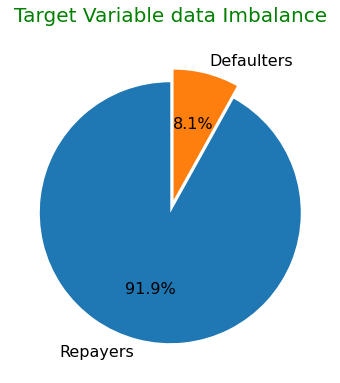

In [450]:
# Showing imbalance in a Pie Chart
lables = 'Repayers','Defaulters'
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Very good')
plt.figure(figsize = [6,6])

plt.pie(appl_data_01["TARGET"].value_counts(), explode=explode, labels=lables, autopct='%1.1f%%', 
        textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'}, startangle=90)

# Adding and formatting title
plt.title("Target Variable data Imbalance\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

plt.show()

### Merging the Application dataset & Previous Application dataset

In [459]:
inp = pd.merge(appl_data_01,prev_appl_data_01, on = "SK_ID_CURR", how = "inner")
print(inp.shape) # We have merged both the Datasets, Now let's do Univariate & Bivariate analysis on the inp dataset

(1413701, 106)


### Analysis of important variables

In [483]:
inp.NAME_INCOME_TYPE.value_counts(normalize = True) * 100 
#Percentage of applicants based on their income type

Working                 51.219388
Commercial associate    22.740381
Pensioner               19.349495
State servant            6.679206
Unemployed               0.008701
Student                  0.001698
Maternity leave          0.001132
Name: NAME_INCOME_TYPE, dtype: float64

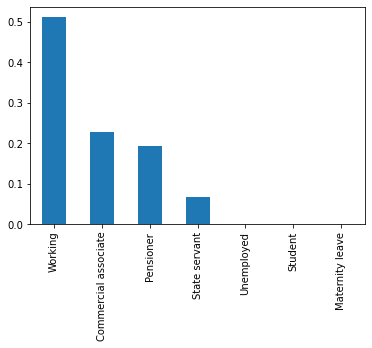

In [489]:
inp.NAME_INCOME_TYPE.value_counts(normalize = True).plot.bar();

In [527]:
inp.groupby("NAME_INCOME_TYPE")["TARGET"].value_counts()

NAME_INCOME_TYPE      TARGET
Commercial associate  0         295396
                      1          26085
Maternity leave       1             16
Pensioner             0         257586
                      1          15958
State servant         0          88370
                      1           6054
Student               0             24
Unemployed            1             67
                      0             56
Working               0         649909
                      1          74180
Name: TARGET, dtype: int64

In [528]:
inp.groupby("NAME_INCOME_TYPE")["TARGET"].value_counts(normalize = True) * 100

NAME_INCOME_TYPE      TARGET
Commercial associate  0          91.885990
                      1           8.114010
Maternity leave       1         100.000000
Pensioner             0          94.166204
                      1           5.833796
State servant         0          93.588494
                      1           6.411506
Student               0         100.000000
Unemployed            1          54.471545
                      0          45.528455
Working               0          89.755403
                      1          10.244597
Name: TARGET, dtype: float64

**Observation:**
The Unemployed & Maternity leave applicants are most likely to ne Defaulters

In [491]:
inp.NAME_EDUCATION_TYPE.value_counts(normalize = True) * 100  #Percentage of applicants based on their Eduaction type 

Secondary / secondary special    73.417363
Higher education                 22.129503
Incomplete higher                 3.198060
Lower secondary                   1.214118
Academic degree                   0.040956
Name: NAME_EDUCATION_TYPE, dtype: float64

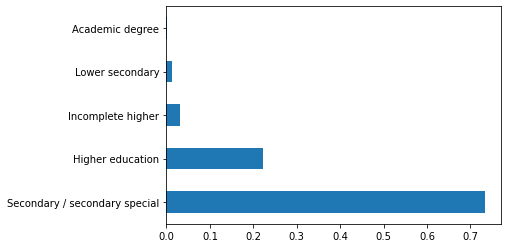

In [494]:
inp.NAME_EDUCATION_TYPE.value_counts(normalize = True).plot.barh();

In [548]:
inp.groupby("NAME_EDUCATION_TYPE")["TARGET"].value_counts()

NAME_EDUCATION_TYPE            TARGET
Academic degree                0            569
                               1             10
Higher education               0         293922
                               1          18923
Incomplete higher              0          41149
                               1           4062
Lower secondary                0          15297
                               1           1867
Secondary / secondary special  0         940404
                               1          97498
Name: TARGET, dtype: int64

In [544]:
inp.groupby("NAME_EDUCATION_TYPE")["TARGET"].value_counts(normalize = True) * 100

NAME_EDUCATION_TYPE            TARGET
Academic degree                0         98.272884
                               1          1.727116
Higher education               0         93.951318
                               1          6.048682
Incomplete higher              0         91.015461
                               1          8.984539
Lower secondary                0         89.122582
                               1         10.877418
Secondary / secondary special  0         90.606242
                               1          9.393758
Name: TARGET, dtype: float64

**Observation:** Among all others applicants who has their education type as Lower Secondary are most likely to be defaulters

In [495]:
inp.NAME_FAMILY_STATUS.value_counts(normalize = True) * 100 
#Percentage of applicants based on their Family Status

Married                 64.434417
Single / not married    13.203428
Civil marriage          10.126399
Separated                6.460914
Widow                    5.774842
Name: NAME_FAMILY_STATUS, dtype: float64

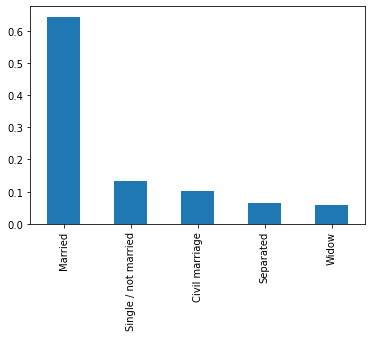

In [499]:
inp.NAME_FAMILY_STATUS.value_counts(normalize = True).plot.bar();

In [525]:
inp.groupby("NAME_FAMILY_STATUS")["TARGET"].value_counts(normalize = True)*100

NAME_FAMILY_STATUS    TARGET
Civil marriage        0         89.686149
                      1         10.313851
Married               0         91.657683
                      1          8.342317
Separated             0         91.513937
                      1          8.486063
Single / not married  0         89.841260
                      1         10.158740
Widow                 0         94.008991
                      1          5.991009
Name: TARGET, dtype: float64

**Observation:** Among all others applicants who are single & had Civil marraige are most likely to be defaulters

In [500]:
inp.NAME_HOUSING_TYPE.value_counts(normalize = True) * 100
#Percentage of applicants based on their Housing type

House / apartment      89.478044
With parents            4.358347
Municipal apartment     3.645255
Rented apartment        1.399518
Office apartment        0.808375
Co-op apartment         0.310462
Name: NAME_HOUSING_TYPE, dtype: float64

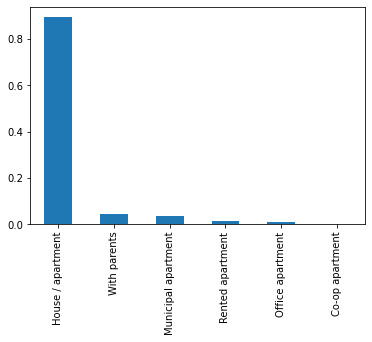

In [501]:
inp.NAME_HOUSING_TYPE.value_counts(normalize = True).plot.bar();

In [550]:
inp.groupby("NAME_HOUSING_TYPE")["TARGET"].value_counts()

NAME_HOUSING_TYPE    TARGET
Co-op apartment      0            4018
                     1             371
House / apartment    0         1158992
                     1          105960
Municipal apartment  0           46655
                     1            4878
Office apartment     0           10603
                     1             825
Rented apartment     0           17301
                     1            2484
With parents         0           53772
                     1            7842
Name: TARGET, dtype: int64

In [549]:
inp.groupby("NAME_HOUSING_TYPE")["TARGET"].value_counts(normalize = True)*100

NAME_HOUSING_TYPE    TARGET
Co-op apartment      0         91.547049
                     1          8.452951
House / apartment    0         91.623398
                     1          8.376602
Municipal apartment  0         90.534221
                     1          9.465779
Office apartment     0         92.780889
                     1          7.219111
Rented apartment     0         87.445034
                     1         12.554966
With parents         0         87.272373
                     1         12.727627
Name: TARGET, dtype: float64

**Observation:** Among all others applicants who live in Rented apartment are most likely to be defaulters

In [552]:
inp.CNT_CHILDREN.value_counts(normalize = True) * 100

0     71.079953
1     19.002604
2      8.519411
3      1.220343
4      0.136238
5      0.029356
6      0.007003
7      0.001344
10     0.001132
8      0.000566
19     0.000566
9      0.000495
14     0.000495
12     0.000283
11     0.000212
Name: CNT_CHILDREN, dtype: float64

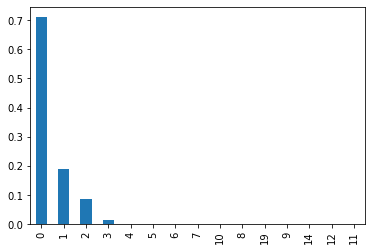

In [553]:
inp.CNT_CHILDREN.value_counts(normalize = True).plot.bar();

In [554]:
inp.groupby("CNT_CHILDREN")["TARGET"].value_counts()

CNT_CHILDREN  TARGET
0             0         921890
              1          82968
1             0         242687
              1          25953
2             0         109026
              1          11413
3             0          15569
              1           1683
4             0           1652
              1            274
5             0            376
              1             39
6             0             79
              1             20
7             0             19
8             0              8
9             1              7
10            0             16
11            1              3
12            0              4
14            0              7
19            0              8
Name: TARGET, dtype: int64

In [555]:
inp.groupby("CNT_CHILDREN")["TARGET"].value_counts(normalize = True)*100

CNT_CHILDREN  TARGET
0             0          91.743311
              1           8.256689
1             0          90.339116
              1           9.660884
2             0          90.523834
              1           9.476166
3             0          90.244609
              1           9.755391
4             0          85.773624
              1          14.226376
5             0          90.602410
              1           9.397590
6             0          79.797980
              1          20.202020
7             0         100.000000
8             0         100.000000
9             1         100.000000
10            0         100.000000
11            1         100.000000
12            0         100.000000
14            0         100.000000
19            0         100.000000
Name: TARGET, dtype: float64

#### Reuseable Plotting Functions

In [558]:
def create_pie_plot(Column,dataframe):
    #lables = dataframe[Column].value_counts()
    lables = list(pd.unique(dataframe[Column]))
    #explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Very good')
    plt.figure(figsize = [6,6])

    #dataframe[Column].value_counts()
    plt.pie(dataframe[Column].value_counts(), labels=lables, autopct='%1.1f%%', 
            textprops={'fontsize': 15, 'fontweight' : 15, 'color' : 'Black'}, startangle=90,labeldistance=1.05)
    #plt.legend(bbox_to_anchor=(1,0), loc="center right", fontsize=12, bbox_transform=plt.gcf().transFigure)
    plt.legend(bbox_to_anchor=(1, 0, 0.5, 1), loc="center left", fontsize=12, bbox_transform=plt.gcf().transFigure)
   
    title = "Distribution of "+ Column.title() + " Variable"
    plt.title(title, fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

    plt.show()

In [559]:
def create_pie_plot2(Column,dataframe):
    plt.figure(figsize=[15,7])
    dataframe[Column].value_counts(normalize=True).plot.pie(autopct='%1.1f%%',textprops={'fontsize': 8, 'fontweight' : 8, 'color' : 'Black'},labeldistance=1.05)
    title = "Distribution of "+ Column.title() + " Variable"
    plt.title(title, fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
    plt.ylabel("")
    plt.show()

In [560]:
def create_barh_plot(Column,dataframe):
    plt.figure(figsize = (15,20))
    dataframe[Column].value_counts().plot.barh()
    title = "Distribution of "+ Column.title() + " Variable"
    plt.title(title,color="blue", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'blue'})
    plt.xticks(size=15,color='Black')
    plt.show()

In [561]:
def create_bar_plot(Column,dataframe):
    dataframe[Column].value_counts().plot.bar()
    title = "Distribution of "+ Column.title() + " Variable"
    plt.title(title,color="blue", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'blue'})
    plt.xticks(size=15,color='Black')
    plt.show()

In [562]:
def create_hist_plot(Column,dataframe):
    dataframe[Column].value_counts().plot.hist()
    title = "Distribution of "+ Column.title() + " Variable"
    plt.title(title,color="Green", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
    plt.show()

In [563]:
def create_dist_plot(Column,dataframe):
    sns.set_style("dark")
    sns.distplot(dataframe.Column,bins=20,color="Green")
    title = "Distribution of "+ Column.title() + " Variable"
    plt.title(title,color="Green", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
    plt.show()

In [575]:
# function for plotting repetitive countplots in univariate categorical analysis on application_data
# This function will create two subplots: 
# 1. Count plot of categorical column w.r.t TARGET; 
# 2. Percentage of defaulters within column

def univariate_categorical(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = appl_data_01[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = appl_data_01[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"]*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
    # 1. Subplot 1: Count plot of categorical column
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=appl_data_01,
                    hue ="TARGET",
                    order=cat_perc[feature],
                    palette=['g','r'])
    
    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 20, 'fontweight' : 20, 'color' : 'Blue'}) 
    ax1.legend(['Repayer','Defaulter'])
    s.set_xlabel("")
   
    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 15, 'fontweight' : 3, 'color' : 'Blue'})   
        ax1.set_xlabel("")
        ax1.tick_params(axis='both', which='major', labelsize=15)
    else:        
        ax1.set_ylabel("Count",fontdict={'fontsize' : 15, 'fontweight' : 3, 'color' : 'Blue'})   
        ax1.set_xlabel("")
        ax1.tick_params(axis='both', which='major', labelsize=15)        
        
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
        s.set_xlabel("")
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='TARGET', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
        s.set_xlabel("")
    plt.ylabel('Percent of Defaulters [%]', fontsize=15,fontweight=3, color='Blue')
    plt.tick_params(axis='both', which='major', labelsize=15)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 20, 'fontweight' : 20, 'color' : 'Blue'}) 
    ax2.set_xlabel("")
    plt.show();

In [573]:
# function for plotting repetitive countplots in univariate categorical analysis on application_data
# This function will create two subplots: 
# 1. Count plot of categorical column w.r.t TARGET; 
# 2. Percentage of defaulters within column

def univariate_categorical2(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = appl_data_01[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = appl_data_01[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"]*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
    # 1. Subplot 1: Count plot of categorical column
    # sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=appl_data_01,
                    hue ="TARGET",
                    order=cat_perc[feature],
                    palette=['g','r'])
    
    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'}) 
    ax1.legend(['Repayer','Defaulter'])
    
    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})   
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='TARGET', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show();

In [612]:
# function for plotting repetitive countplots in bivariate categorical analysis

def bivariate_bar(x,y,df,hue,figsize):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,
                  y=y,
                  data=df, 
                  hue=hue, 
                  palette =['g','y'])     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.ylabel(y,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})     
    plt.xticks(rotation=90, ha='right')
    plt.legend(labels = ['Repayer','Defaulter'])
    plt.show()

In [637]:
# function for plotting repetitive rel plots in bivaritae numerical analysis on application_data

def bivariate_rel(x,y,data, hue, kind, palette, legend,figsize):
    
    plt.figure(figsize=figsize)
    sns.relplot(x=x, 
                y=y, 
                data=appl_data_01, 
                hue="TARGET",
                kind=kind,
                palette = ['g','y'],
                legend = False)
    plt.legend(['Repayer','Defaulter'])
    plt.xticks(rotation=90, ha='right')
    plt.show()

In [568]:
#function for plotting repetitive countplots in univariate categorical analysis on the merged df

def univariate_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, 
                  data=df,
                  hue= hue,
                  palette= palette,
                  order=df[col].value_counts().index)
    

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})     
    else:
        plt.ylabel("Count",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})       

    plt.title(col , fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=90, ha='right')
    
    plt.show()

In [649]:

# Function to plot point plots on merged dataframe

def merged_pointplot(x,y):
    plt.figure(figsize=(8,4))
    sns.pointplot(x=x, 
                  y=y, 
                  hue="TARGET", 
                  data=inp,
                  palette =['g','y'])
   # plt.legend(['Repayer','Defaulter'])

### Univariate analysis

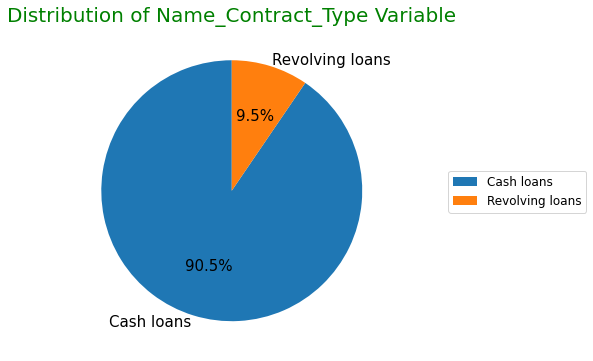

In [571]:
# Distribution based on Contract Type of Loan - Revolving or Cash Loans
create_pie_plot('NAME_CONTRACT_TYPE',appl_data_01)

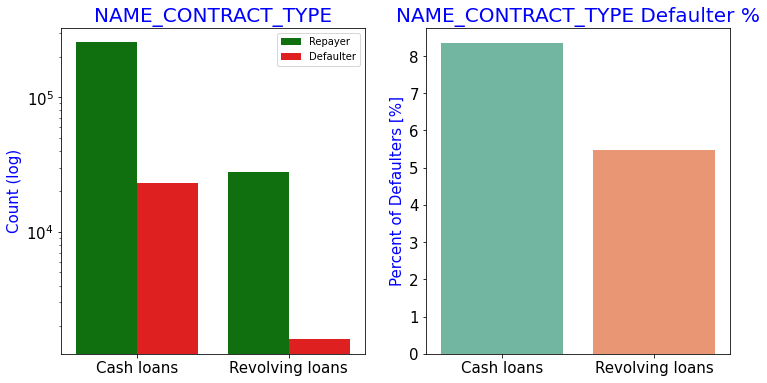

In [576]:
# Checking the contract type based on loan repayment status
univariate_categorical('NAME_CONTRACT_TYPE',True)

**Obsevation:** Revolving loans has more percentage of defaulters compared to the Cash loans

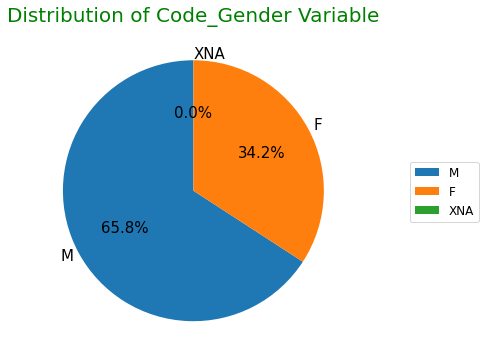

In [578]:
# Distribution of the people bases on Gender
create_pie_plot('CODE_GENDER',appl_data_01)

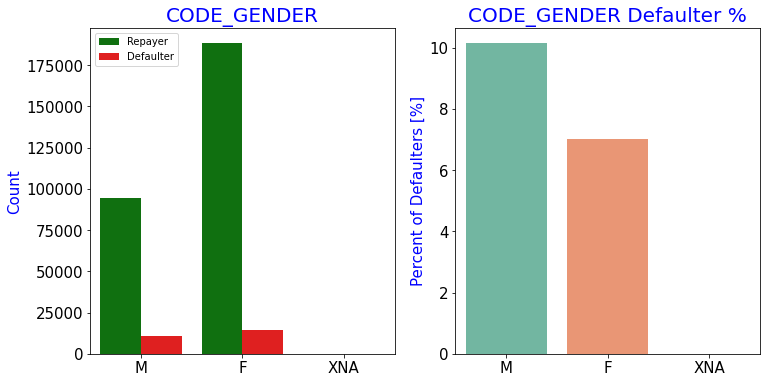

In [579]:
# Checking the type of Gender on loan repayment status
univariate_categorical('CODE_GENDER')

**Observation:** Male has high tendency to be defaulters compared to Females, We can infer that from the above Bar chart.

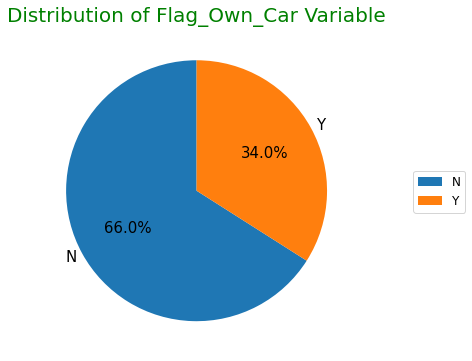

In [580]:
create_pie_plot('FLAG_OWN_CAR',appl_data_01)
# Distribution of People owning a car vs not owning the car

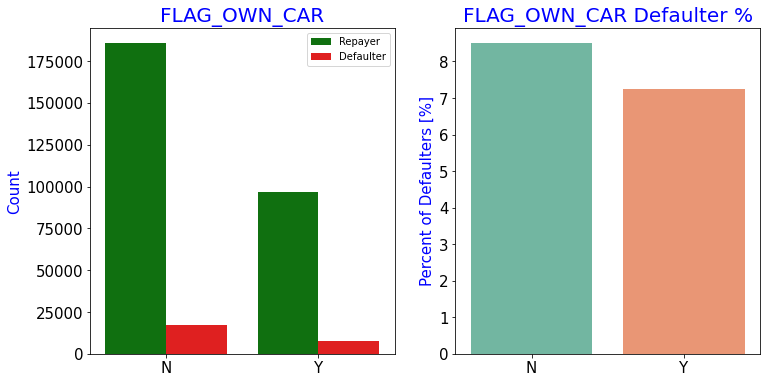

In [581]:
# Checking if owning a car is related to loan repayment status
univariate_categorical('FLAG_OWN_CAR')

**Observation:** The percentage of defaulters who doen't own a car & who own a car are almost same. We can't infer anything here.

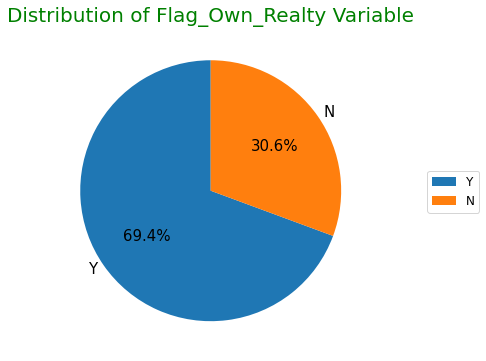

In [582]:
# Distribution of People real-estate vs not owning real-estate
create_pie_plot('FLAG_OWN_REALTY',appl_data_01)

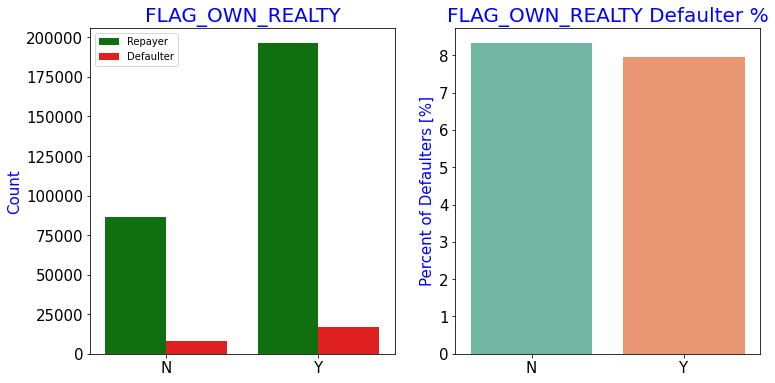

In [583]:
# Checking if owning a realty is related to loan repayment status
univariate_categorical('FLAG_OWN_REALTY')

**Observation:** The percentage of defaulters who doen't own a car & who own a car are almost same. We can't infer anything here.

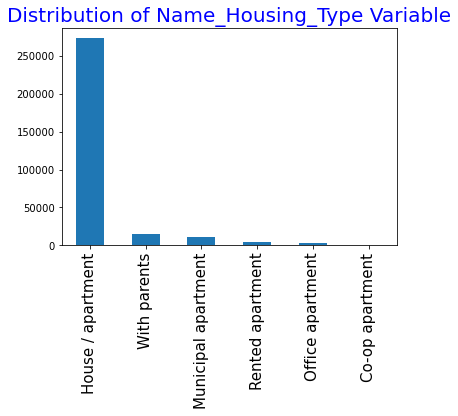

In [584]:
# Distribution of Various housing Type for the provided set of records
create_bar_plot('NAME_HOUSING_TYPE',appl_data_01)

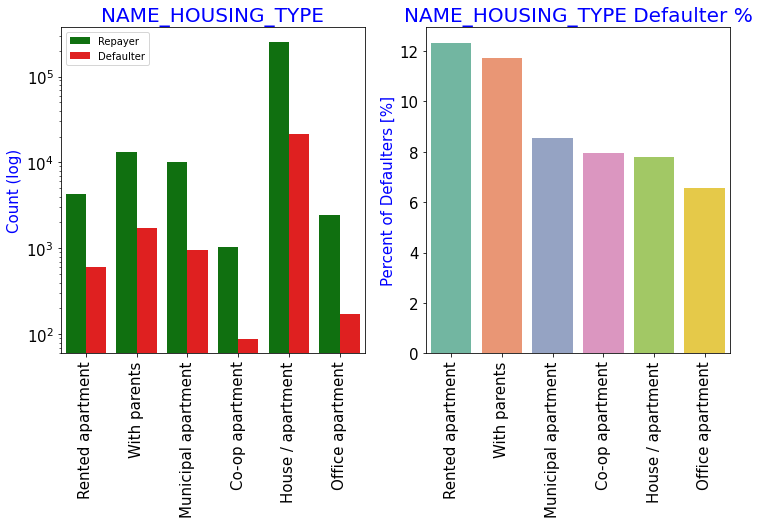

In [585]:
# Analyzing Housing Type based on loan repayment status
univariate_categorical("NAME_HOUSING_TYPE",True,True,True)

**Observations:**
Majority of people live in House/apartment.
People living in office apartments have lowest default rate &
People living with parents (around 11.5%) and living in rented apartments(> 12%) have higher probability of defaulting

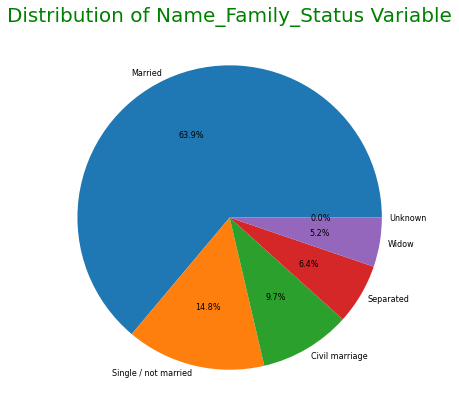

In [587]:
create_pie_plot2("NAME_FAMILY_STATUS",appl_data_01)

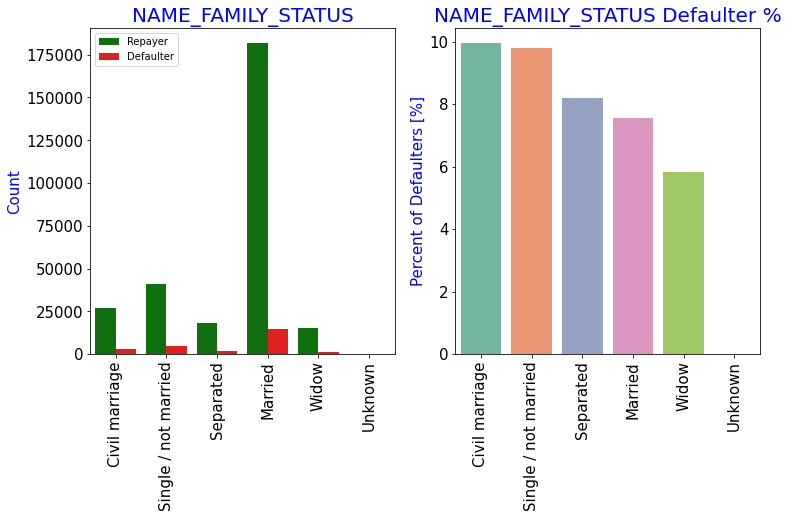

In [588]:
# Analyzing Family status based on loan repayment status
univariate_categorical("NAME_FAMILY_STATUS",False,True,True)

**Observations:**
-  Most of the people who have taken loan are married, followed by Single/not married and civil marriage
-  In terms of percentage of not repayment of loan, Civil marriage has the highest percent of not repayment (10%), with Widow    the lowest (exception being Unknown).

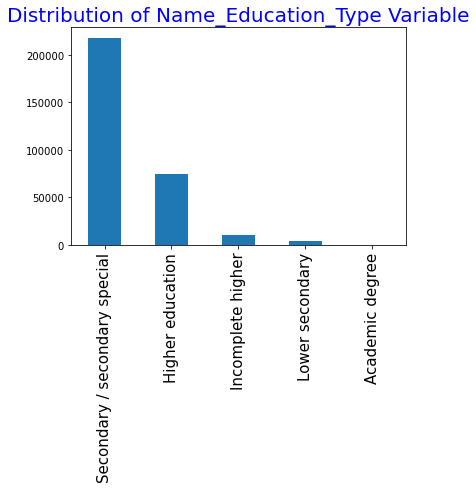

In [590]:
create_bar_plot("NAME_EDUCATION_TYPE",appl_data_01)

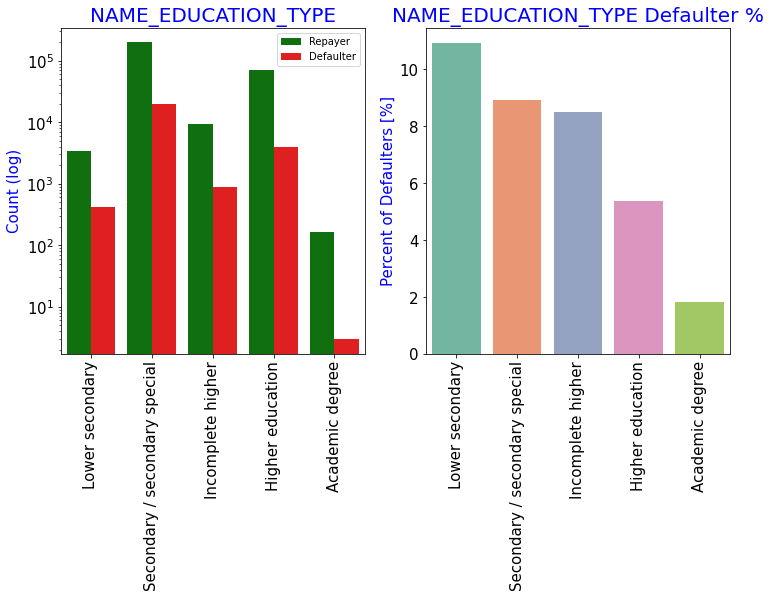

In [591]:
# Analyzing Education Type based on loan repayment status
univariate_categorical("NAME_EDUCATION_TYPE",True,True,True)

**Observations:**
-  The majority of loan applicants did secondary education followed by Higher education
-  Applicants with Lower Secondary Education has most defaulters among others(> 10%) & the lowest rate of defaulters are the applicants who has Academic degree

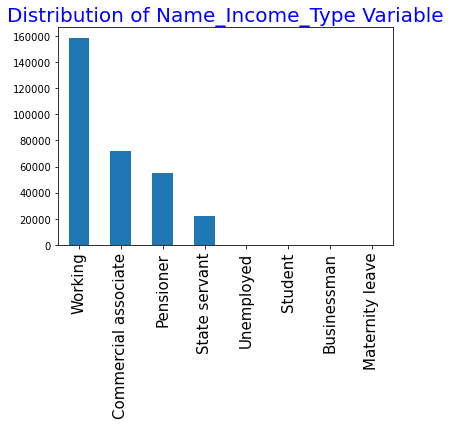

In [593]:
create_bar_plot("NAME_INCOME_TYPE",appl_data_01)

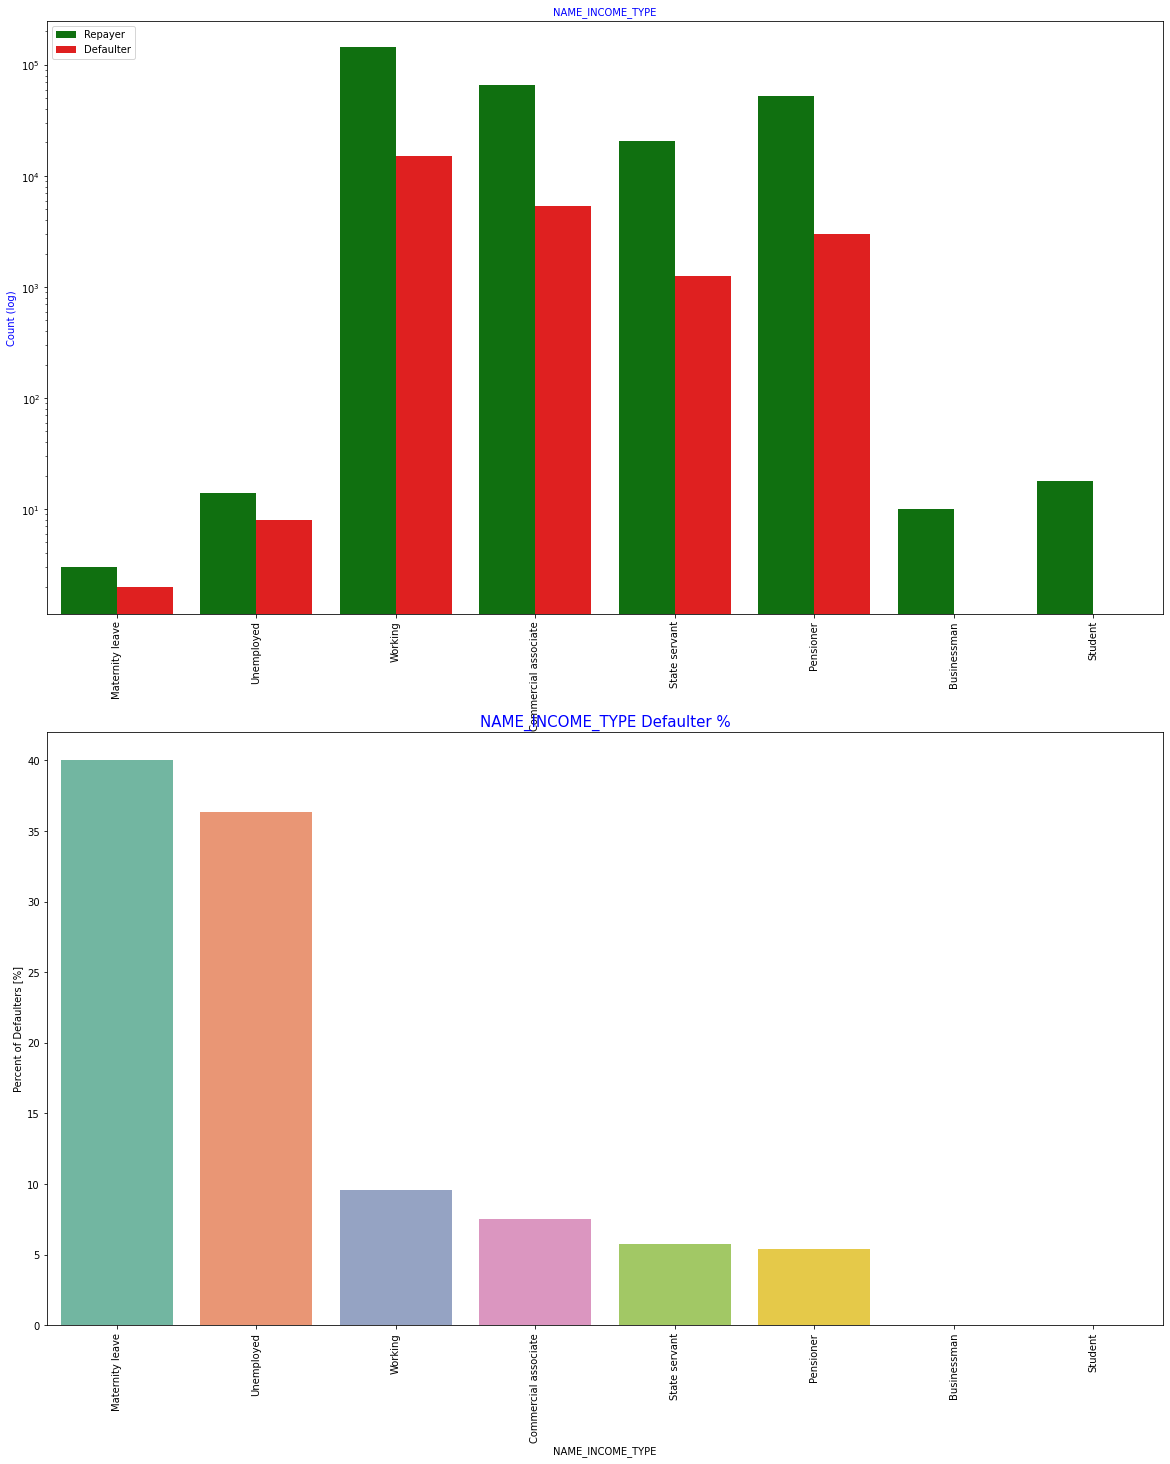

In [594]:
# Analyzing Income Type based on loan repayment status
univariate_categorical2("NAME_INCOME_TYPE",True,True,False)

**Observations:**
-  Most of applicants for loans have income type as Working, followed by Commercial associate, Pensioner and State servant.
-  The applicants with the type of income Maternity leave have almost make 40% ratio of the defaulters, followed by Unemployed (37%). The rest of types of incomes are under the average of 10% for not returning loans.
-  Student and Businessmen, though less in numbers do not have any default record. Thus these two category are safest for providing loan.

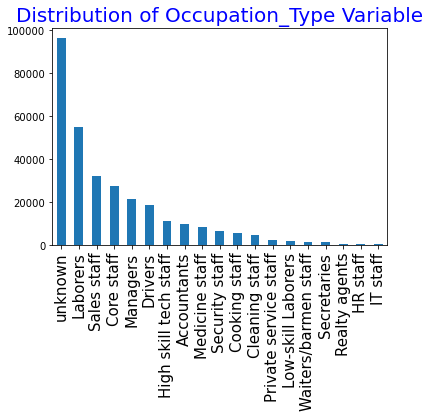

In [596]:
# Distribution of OCCUPATION_TYPE of Clients
create_bar_plot("OCCUPATION_TYPE",appl_data_01)

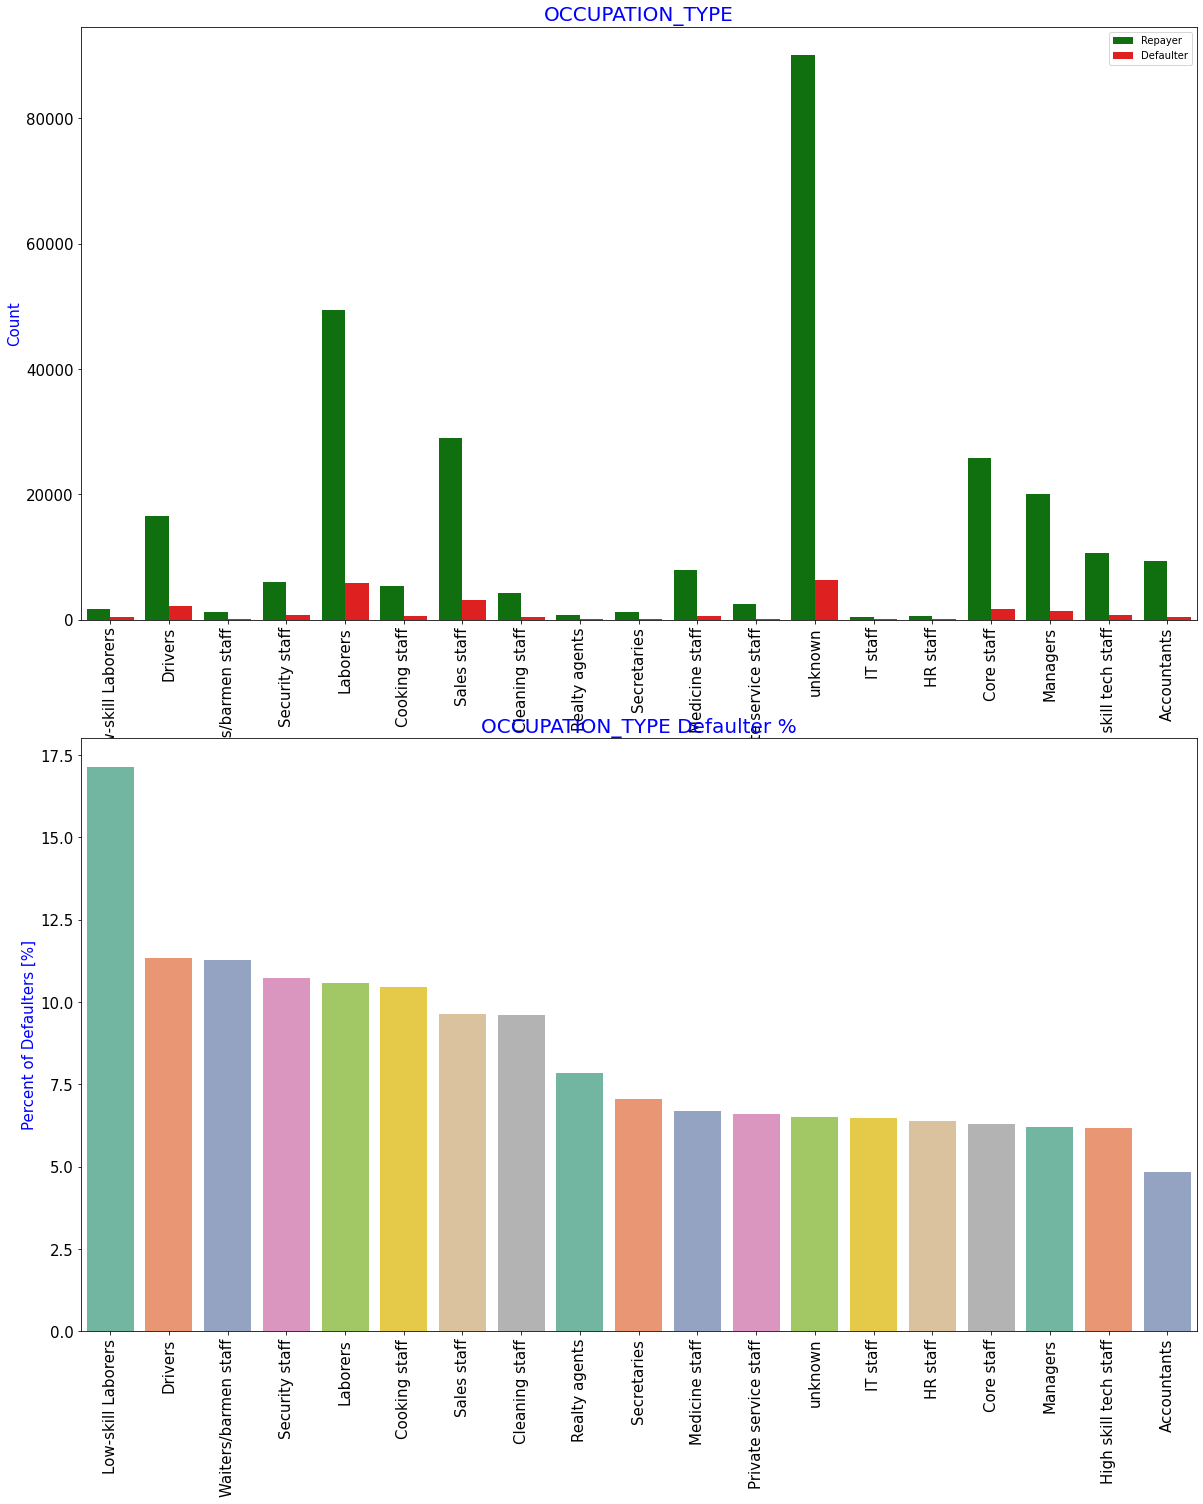

In [595]:
# Analyzing Occupation Type where applicant lives based on loan repayment status
univariate_categorical("OCCUPATION_TYPE",False,True,False)

**Observations:**

-  Most of the loans are taken by people whose Occupation is "Missing" in the dataset followed by Laborers, Sales staff. IT staff take the lowest amount of loans.
-  The category with highest percent of not repaid loans are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff.

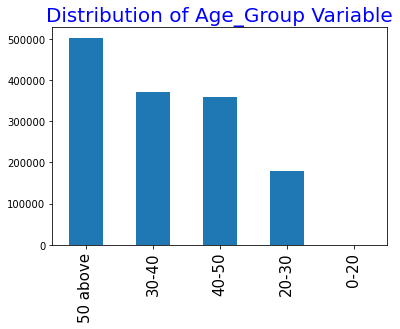

In [598]:
# Distribution of AGE_GROUP of the Clients from  the provided application dataset
create_bar_plot("AGE_GROUP",inp)

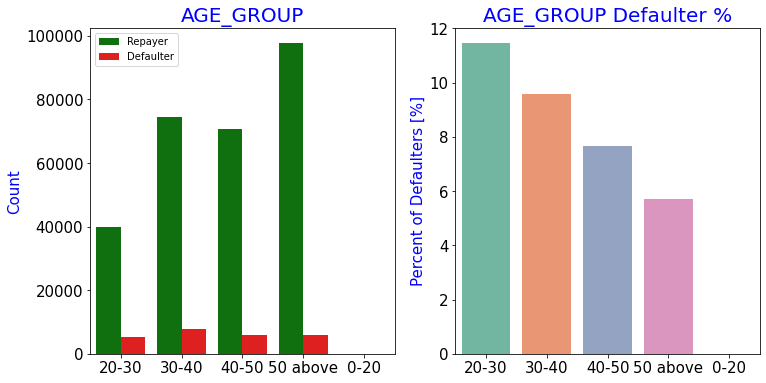

In [599]:
# Analyzing Age Group based on loan repayment status
univariate_categorical("AGE_GROUP",False,False,True)

**Observations:**

-  Applicants whose age group is between **20-30** has more defaulters among other age groups
-  Applicats whose age group is **Above 50** has lowest rate of Defaulters

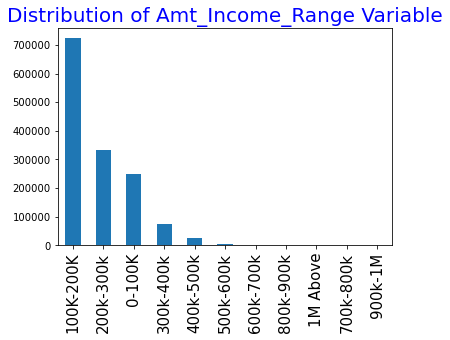

In [601]:
# Distribution of Income of the Clients from the provided application dataset
create_bar_plot("AMT_INCOME_RANGE",inp)

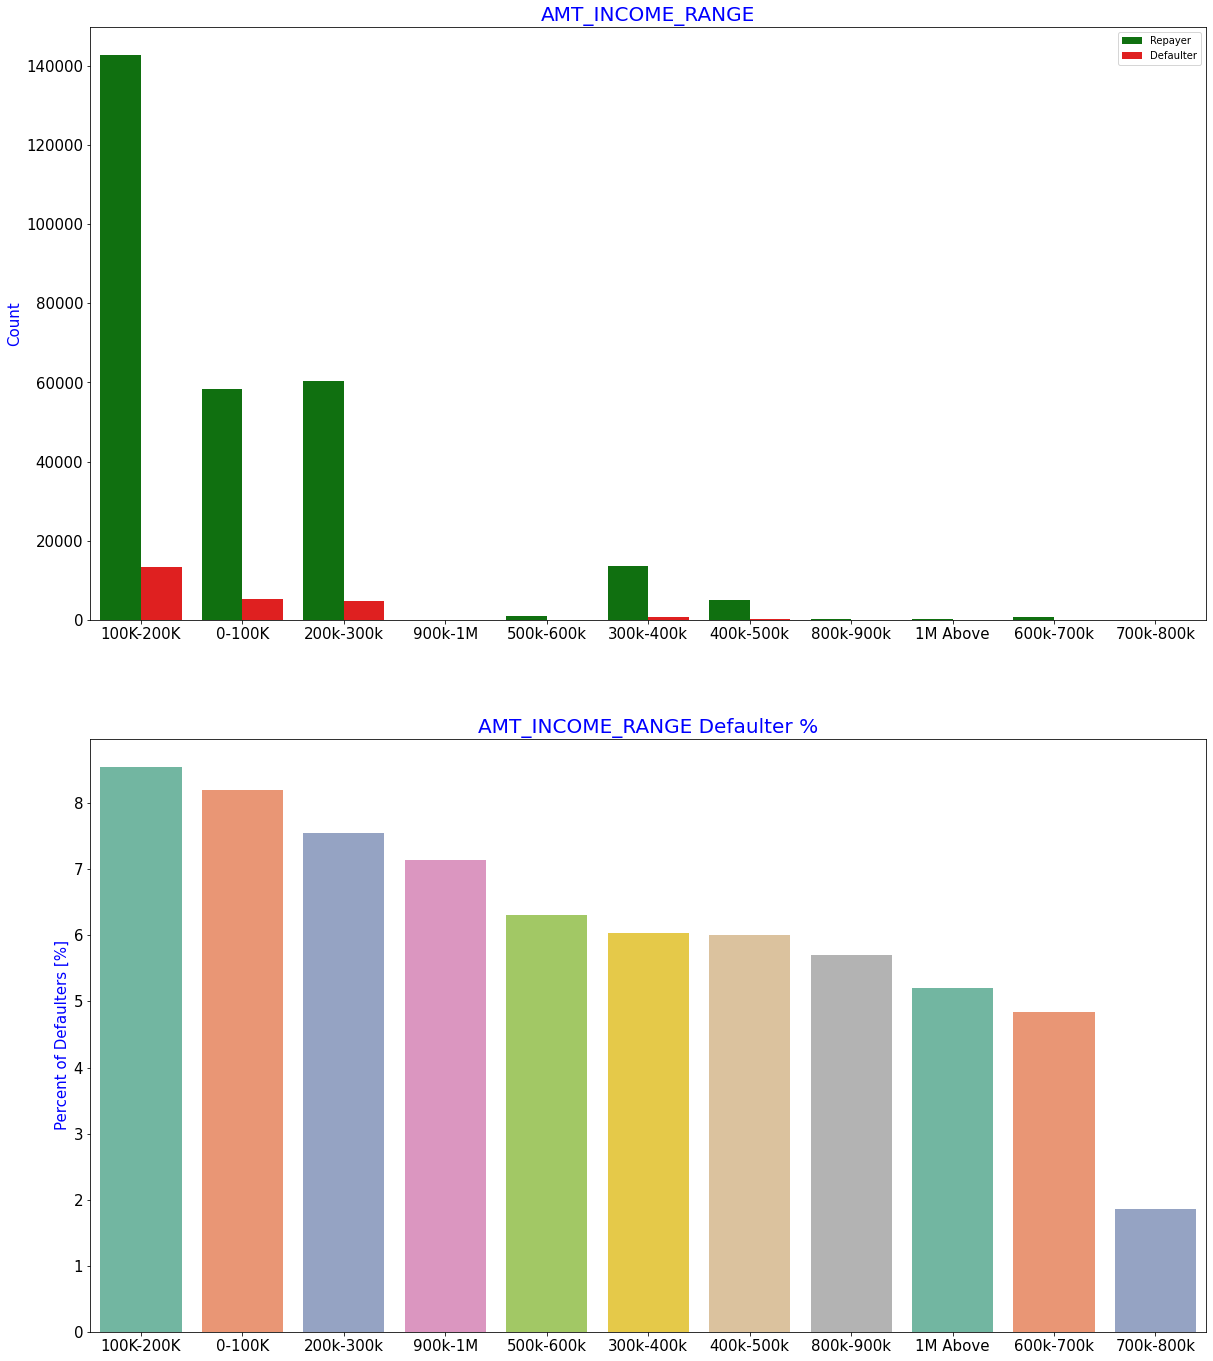

In [602]:
# Analyzing Amount_Income Range based on loan repayment status
univariate_categorical("AMT_INCOME_RANGE",False,False,False)

**Observations**

-  Majority of the applicants have salary between 100-200K
-  Application with Income less than 300,000 has high probability of defaulting
-  Applicant with Income between 700-800k are less likely to default

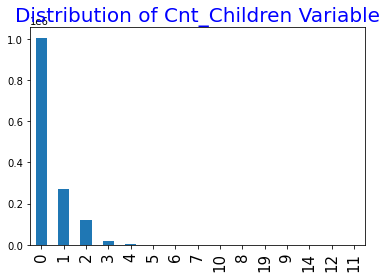

In [604]:
# Distribution of No. of Children of the Clients from the provided application dataset
create_bar_plot("CNT_CHILDREN",inp)

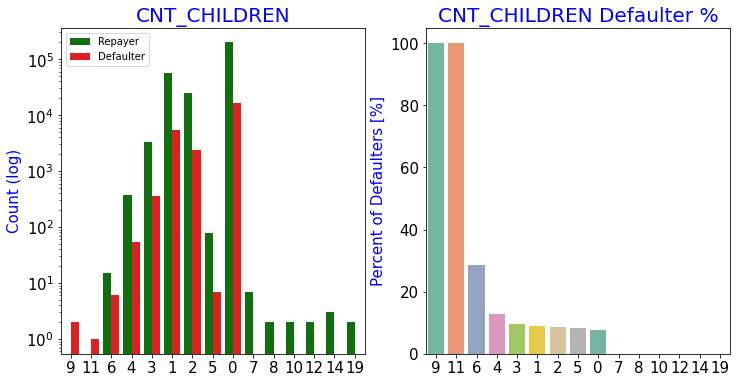

In [605]:
# Analyzing Number of children based on loan repayment status
univariate_categorical("CNT_CHILDREN",True)

**Observations:**
    
-  Applicants with more number of childeren are most likely to be Defaulters
-  Applicants with less than 3 children has low probability to be defaulters

### Bi/Multivariate Analysis

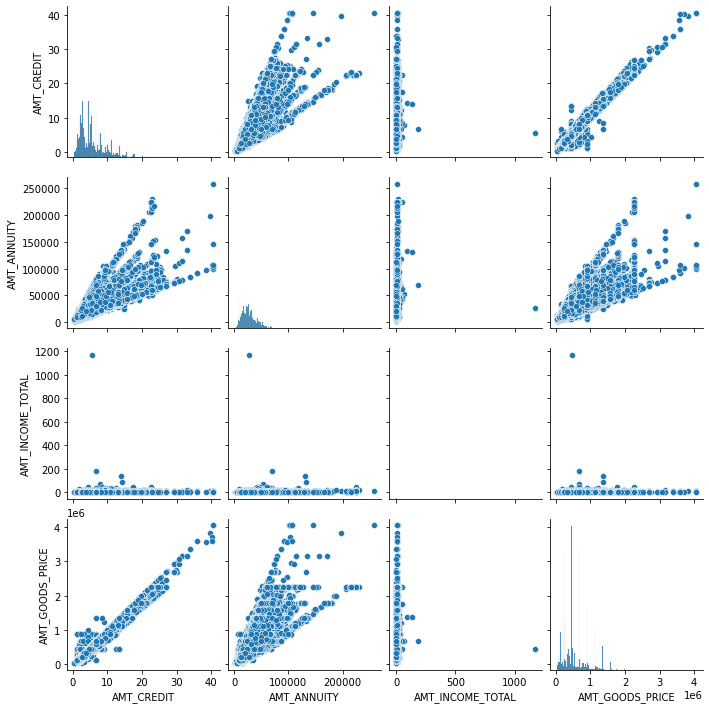

In [616]:
#Plotting pairplot between amount variable
sns.pairplot(appl_data_01[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE']])
plt.show()

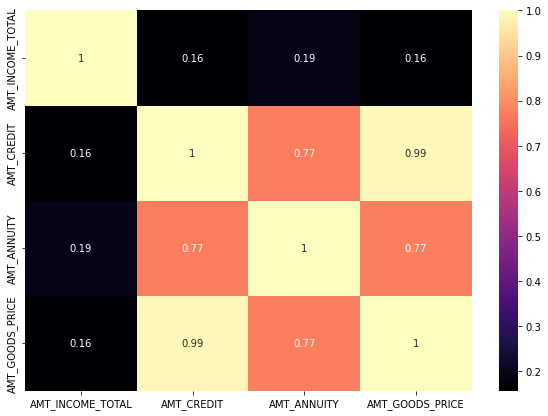

In [621]:
#Correlation between variables
plt.figure(figsize=[10,7])
sns.heatmap(appl_data_01[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']].corr(), annot=True, cmap ="magma")
plt.show()

**Observation:** High correlation between AMT_CREDIT and AMT_GOODS_PRICE - Applicants owning goods of high value can take loans of higher amounts.

In [623]:
appl_data_01.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [625]:
# Bifurcating the application_data dataframe based on Target value 0 and 1 for correlation and other analysis
cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


Repayer_df = appl_data_01.loc[appl_data_01['TARGET']==0, cols_for_correlation] # Repayers
Defaulter_df = appl_data_01.loc[appl_data_01['TARGET']==1, cols_for_correlation] # Defaulters

In [626]:
# Getting the top 10 correlation for the Repayers data
corr_repayer = Repayer_df.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

,VAR1,VAR2,Correlation
122,AMT_GOODS_PRICE,AMT_CREDIT,0.987022
371,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149
300,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
495,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861
588,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.830381
123,AMT_GOODS_PRICE,AMT_ANNUITY,0.776421
92,AMT_ANNUITY,AMT_CREDIT,0.771297
216,DAYS_EMPLOYED,DAYS_BIRTH,0.626037
335,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.539005
365,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,0.537301


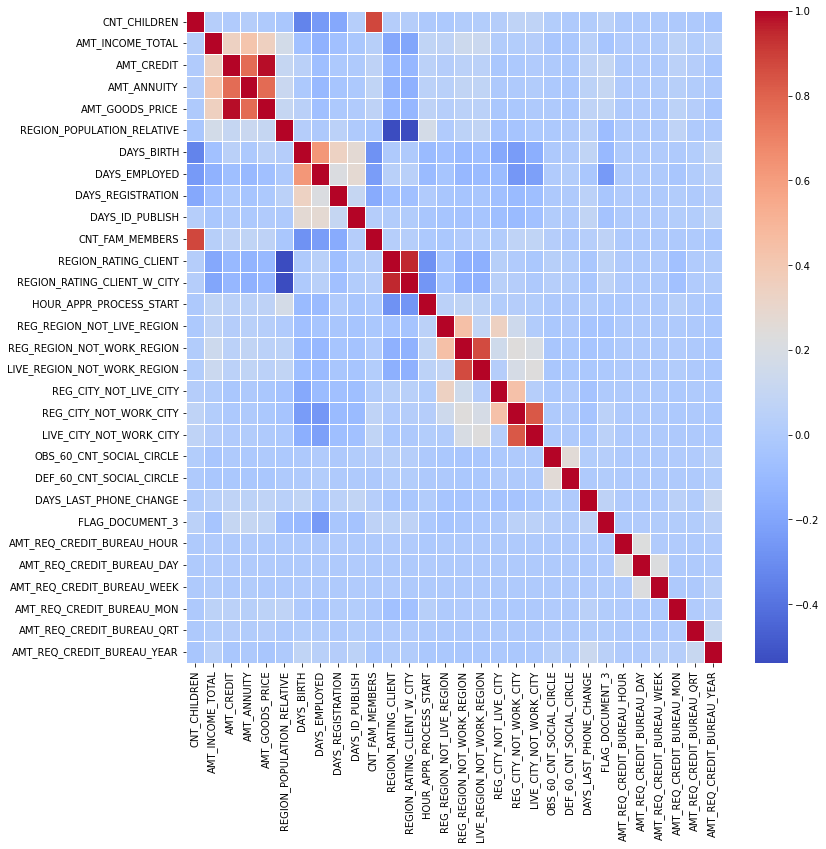

In [630]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Repayer_df.corr(), cmap="coolwarm",annot=False,linewidth =1)

**Observations:**
Correlating factors amongst repayers:
Credit amount is highly correlated with
-  amount of goods price
-  loan annuity
-  total income

In [631]:
# Getting the top 10 correlation for the Defaulter data
corr_Defaulter = Defaulter_df.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)

,VAR1,VAR2,Correlation
122,AMT_GOODS_PRICE,AMT_CREDIT,0.982783
371,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637
300,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
495,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847885
588,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.778540
123,AMT_GOODS_PRICE,AMT_ANNUITY,0.752295
92,AMT_ANNUITY,AMT_CREDIT,0.752195
216,DAYS_EMPLOYED,DAYS_BIRTH,0.582442
464,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.497937
557,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,0.472052


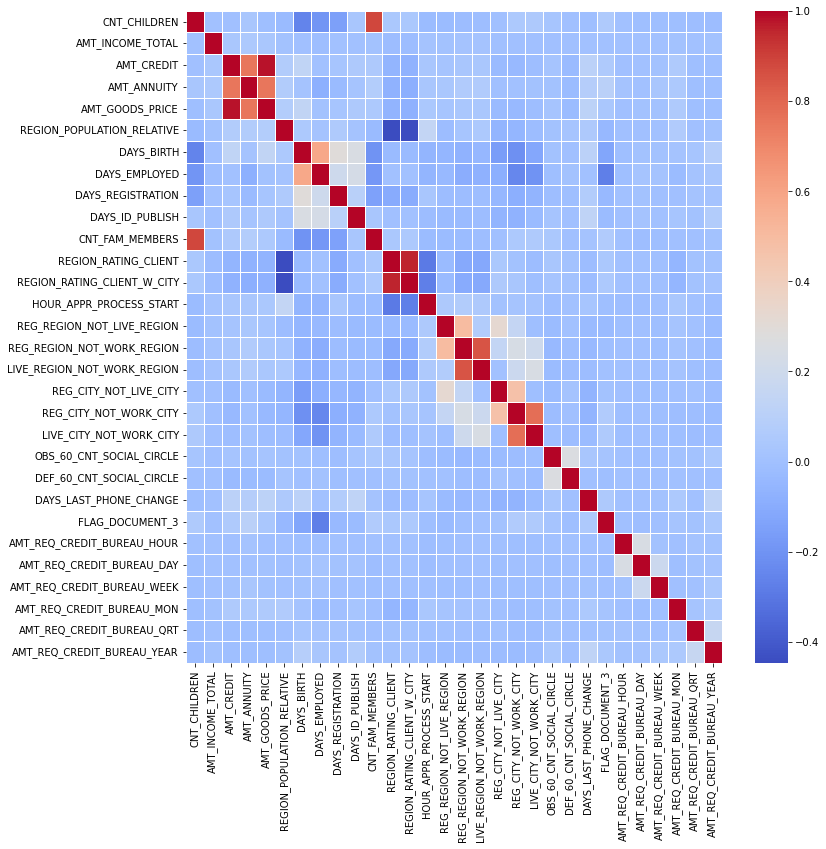

In [634]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Defaulter_df.corr(), cmap="coolwarm",annot=False,linewidth =1)

**Observation:**
-  Credit amount is highly correlated with amount of goods price which is same as repayers.
-  The loan annuity correlation with credit amount has slightly reduced in defaulters(0.75) when compared to repayers(0.77)
-  The repayers have high correlation in number of days employed(0.62) when compared to defaulters(0.58).
-  There is a severe drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters whereas it is 0.342 among repayers.
-  Days_birth and number of children correlation has reduced to 0.259 in defaulters when compared to 0.337 in repayers.
-  There is a slight increase in defaulted to observed count in social circle among defaulters(0.264) when compared to repayers(0.254)

<Figure size 1080x432 with 0 Axes>

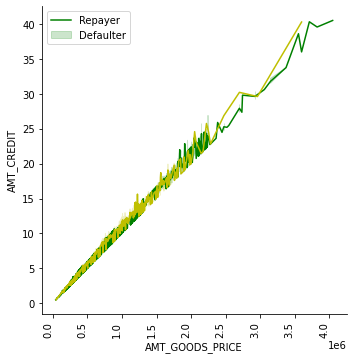

In [638]:
# Checking the relationship between Goods price and credit and comparing with loan repayment staus
bivariate_rel('AMT_GOODS_PRICE','AMT_CREDIT',inp,"TARGET", "line", ['g','r'], False,(15,6))

**Observation:**

There is a rise in the number of defaulters when the loan amount is more than **3 Million**

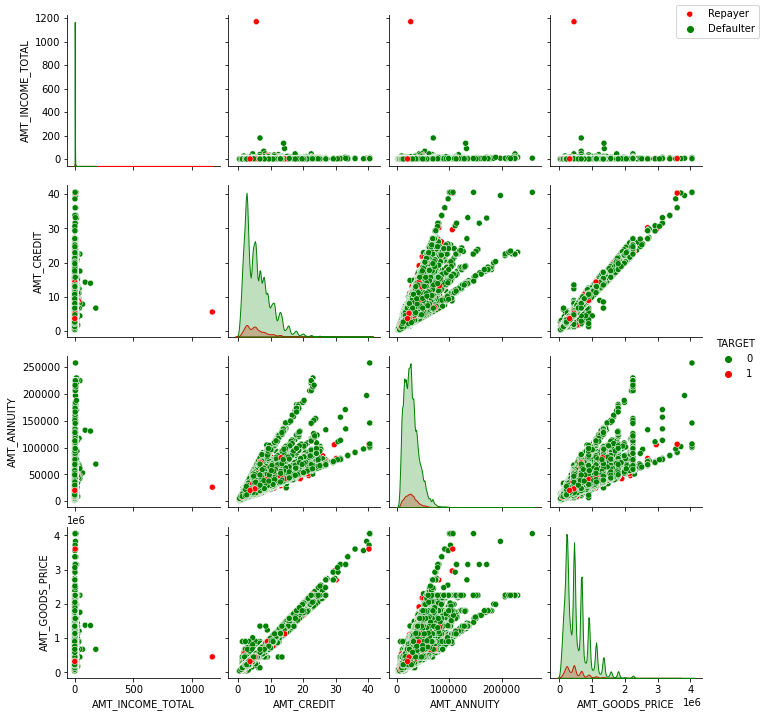

In [641]:
# Plotting pairplot between amount variable to draw reference against loan repayment status
amount = appl_data_01[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]
ax= sns.pairplot(amount,hue="TARGET",palette=["g","r"])
ax.fig.legend(labels=['Repayer','Defaulter'])
plt.show()

**Observation:**

-  When amt_annuity >15000 amt_goods_price> 3M, there is a lesser chance of defaulters
-  AMT_CREDIT and AMT_GOODS_PRICE are highly correlated as based on the scatterplot where most of the data are consolidated in form of a line
-  There are very less defaulters for AMT_CREDIT >3M
-  Inferences related to distribution plot has been already mentioned in previous distplot graphs inferences section

In [643]:
T0 = inp[inp['TARGET']==0] # Repayers
T1 = inp[inp['TARGET']==1] # Defaulters

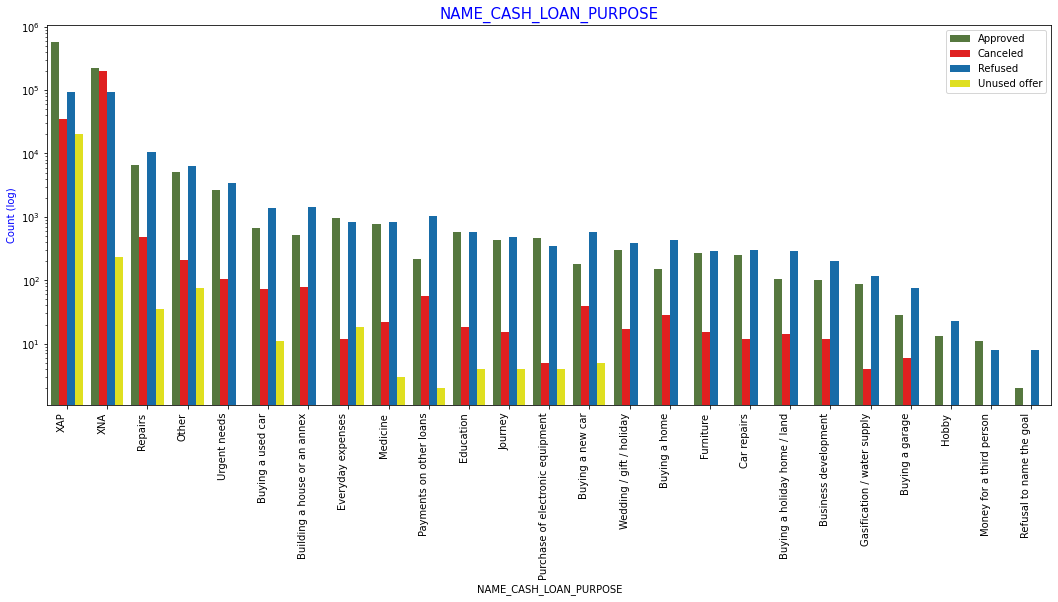

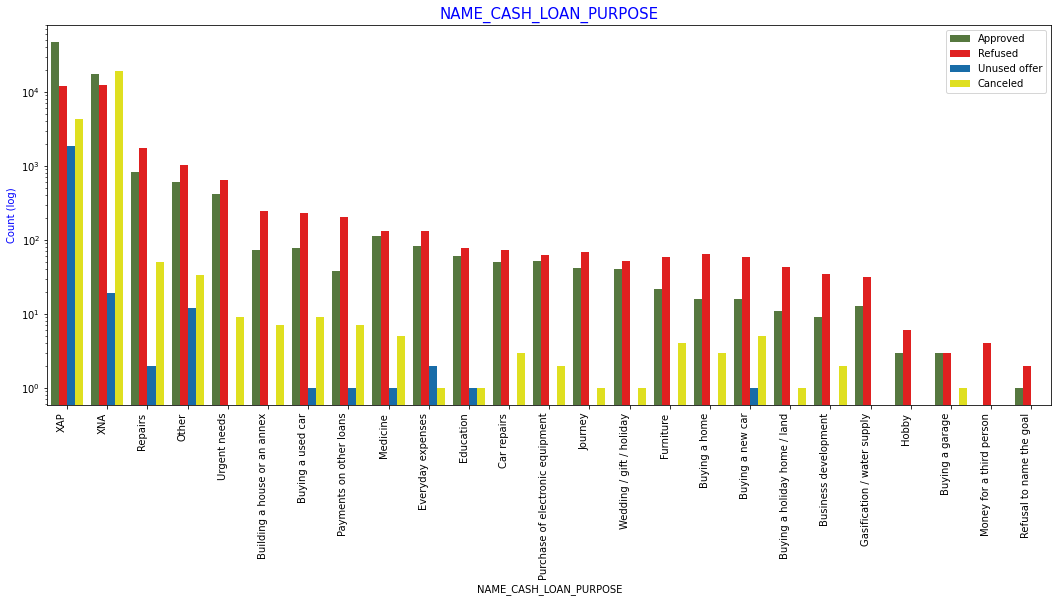

In [644]:
univariate_merged("NAME_CASH_LOAN_PURPOSE",T0,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

univariate_merged("NAME_CASH_LOAN_PURPOSE",T1,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

**Observations:**

-  Loan purpose has high number of unknown values (XAP, XNA)
-  Loan taken for the purpose of Repairs seems to have highest default rate
-  A very high number application have been rejected by bank or refused by client which has purpose as "repair or other". This shows that purpose "repair" is considered as high risk by bank and either they are rejected or bank offered very high loan interest rate which is not feasible by the clients, thus they refuse the loan.

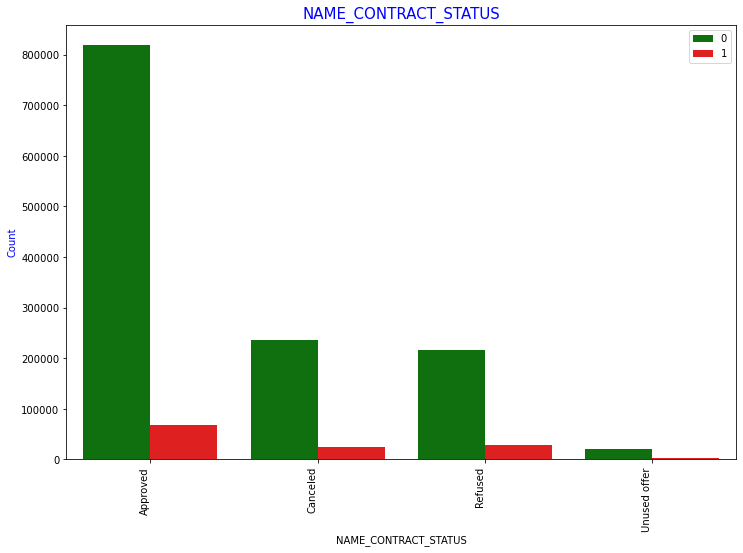

                             Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856     92.41%
                     1        67243      7.59%
Canceled             0       235641     90.83%
                     1        23800      9.17%
Refused              0       215952      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%


In [647]:
# Checking the Contract Status based on loan repayment status and whether there is any business loss or financial loss
univariate_merged("NAME_CONTRACT_STATUS",inp,"TARGET",['g','r'],False,(12,8))
g = inp.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([g.value_counts(),round(g.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
print (df1)

**Observations:**
    
-  90% of the previously cancelled client have actually repayed the loan. Revisiting the interest rates would increase business opportunity for these clients
-  88% of the clients who have been previously refused a loan has payed back the loan in current case.
-  Refusal reason should be recorded for further analysis as these clients would turn into potential repaying customer.

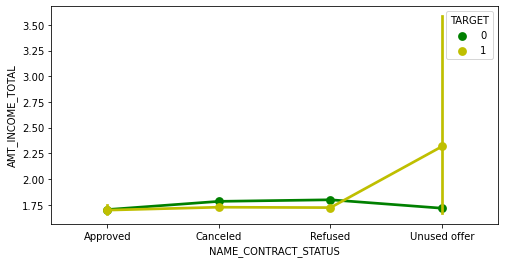

In [650]:
# plotting the relationship between income total and contact status
merged_pointplot("NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL')

**Observation:**

The point plot show that the people who have not used offer earlier have defaulted even when their average income is higher than others

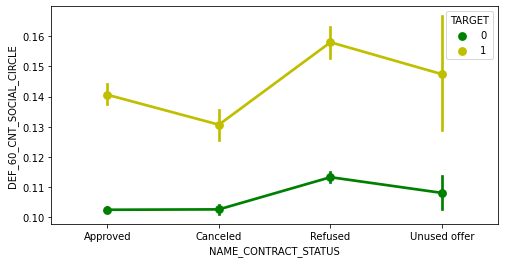

In [651]:
# plotting the relationship between people who defaulted in last 60 days being in client's social circle and contact status
merged_pointplot("NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE')

**Observation:**
Clients who have average of 0.13 or higher DEF_60_CNT_SOCIAL_CIRCLE score tend to default more and hence client's social circle has to be analysed before providing the loan.

## Conclusions

###  Factors for an applicant to be Re-payer. i.e, applications can be approved

-  **AMT_INCOME_TOTAL:** Applicants with Income more than 700,000 are less likely to default
-  **CNT_CHILDREN:** Applicants with zero to two children tend to repay the loans.
-  **DAYS_BIRTH:** Applicants above age of 50 have low probability of defaulting.
-  **NAME_CASH_LOAN_PURPOSE:** Loans bought for Hobby, Buying garage are being repayed mostly.
-  **NAME_EDUCATION_TYPE:** Academic degree has less defaults.
-  **NAME_INCOME_TYPE:** Student and Businessmen have no defaults.

###  Factors for an applicant to be Defaulter. i.e, applications can be Rejected

-  **AMT_GOODS_PRICE:** When the credit amount goes beyond 3M, there is an increase in defaulters.
-  **CODE_GENDER:** Male applicants have relatively higher default rate
-  **CNT_CHILDREN :** Applicants who have children equal to or more than 9 default 100% and hence their applications can to be rejected.
-  **DAYS_BIRTH:** Avoid young applicants who are in age group of 20-40 as they have higher probability of defaulting
-  **NAME_EDUCATION_TYPE:** Applicants with Lower Secondary, Secondary education and incomplete higher education have higher default rate
-  **NAME_FAMILY_STATUS :** Applicants in civil marriage or who are single have higher default rate
-  **NAME_INCOME_TYPE:** Applicants who are either at Maternity leave or Unemployed have higher default rate.
-  **OCCUPATION_TYPE:** Applicants who are Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff as the default rate is huge.
-  **HOUSING_TYPE:** Applicants who live in Rented apartments are most likely to be Defaulters among all other Hosing types

**Additional suggestions:** 

-  90% of the previously cancelled client have actually repayed the loan.
    Recording the reason for cancellation which might help the bank to determine and negotiate terms with these repaying customers in future for increase business opportunity.\
-  88% of the clients who were refused by bank for loan earlier have now turned into a repaying client. Hence documenting the reason for rejection could mitigate the business loss and these clients could be contacted for further loans.